In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge
import seaborn as sns
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from field_map_g4bl import readFieldMapData
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
sys.path.append(parent_dir)
from functions.set_plot_settings import setPlotSettings
setPlotSettings(font=True)

# Animation directory:
ani_dir = 'animations/'

In [2]:
# Inner radius (mm):
a = 420

# Outer radius (mm):
b = 600

In [3]:
# Define function to plot solenoid:
def plot_solenoid(ax):
    circle_inner = plt.Circle([0,0], radius=a, fill=False, linestyle='-', color='white')
    ax.add_patch(circle_inner)
    circle_outer = plt.Circle([0,0], radius=b, fill=False, linestyle='-', color='white')
    ax.add_patch(circle_outer)
    fill = Wedge(center=(0, 0), r=b, theta1=0, theta2=360, width=b - a, color='white', label='Solenoid', alpha=0.8)
    ax.add_patch(fill)
    plt.legend(loc='upper right')

## Single solenoid -- no rotations

### Plot transverse slice at z=0

In [ ]:
data_nopitch = readFieldMapData('fieldmap.txt')

In [5]:
data_slice = data_nopitch[data_nopitch['z'] == 0.0]

x_unique = np.sort(data_slice['x'].unique())
y_unique = np.sort(data_slice['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

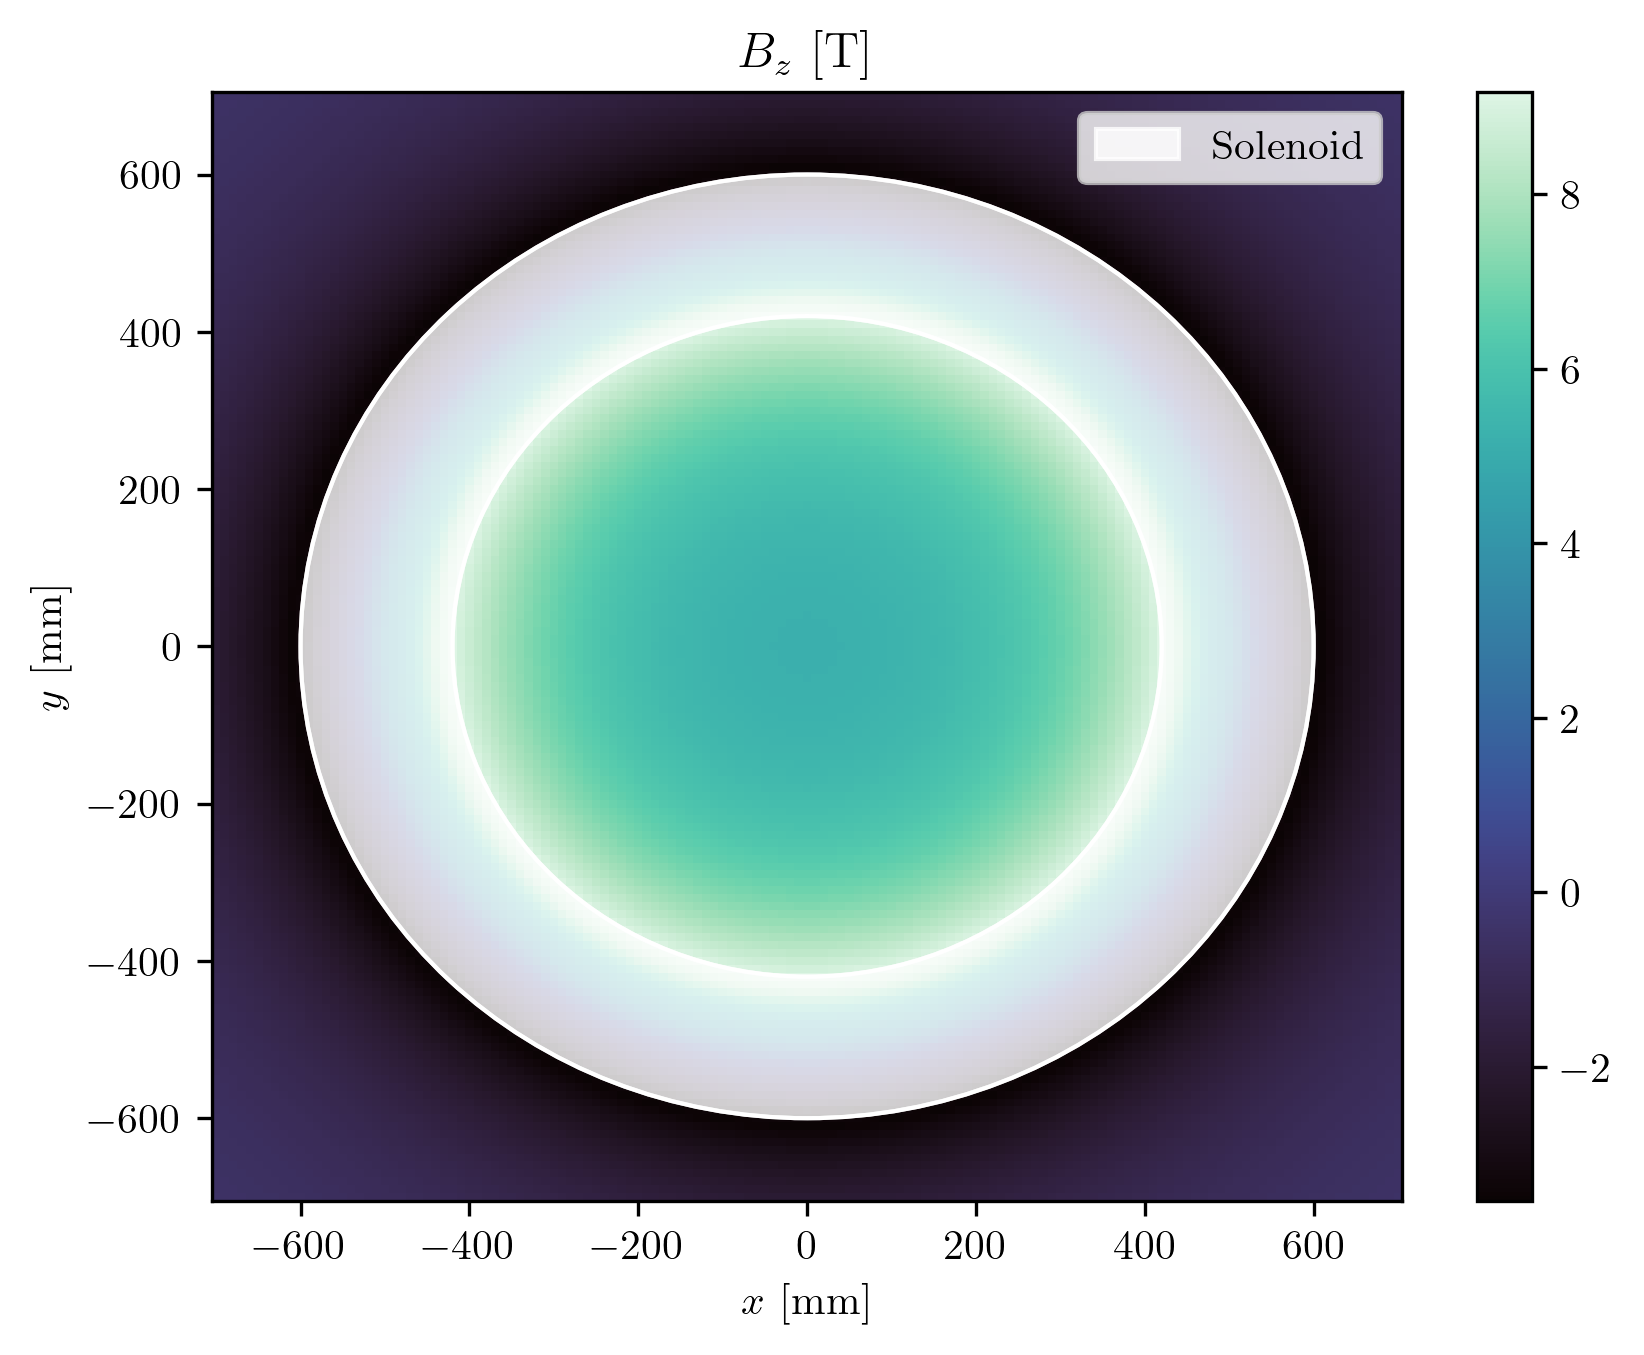

In [6]:
########## B_z ##########

Bz_pivot = data_slice.pivot_table(index='y', columns='x', values='Bz' )
Bz_grid = Bz_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_grid, cmap=cmap, shading='auto', vmin=data_slice['Bz'].min(), vmax=data_slice['Bz'].max())
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_z$ [T]')
plt.show()

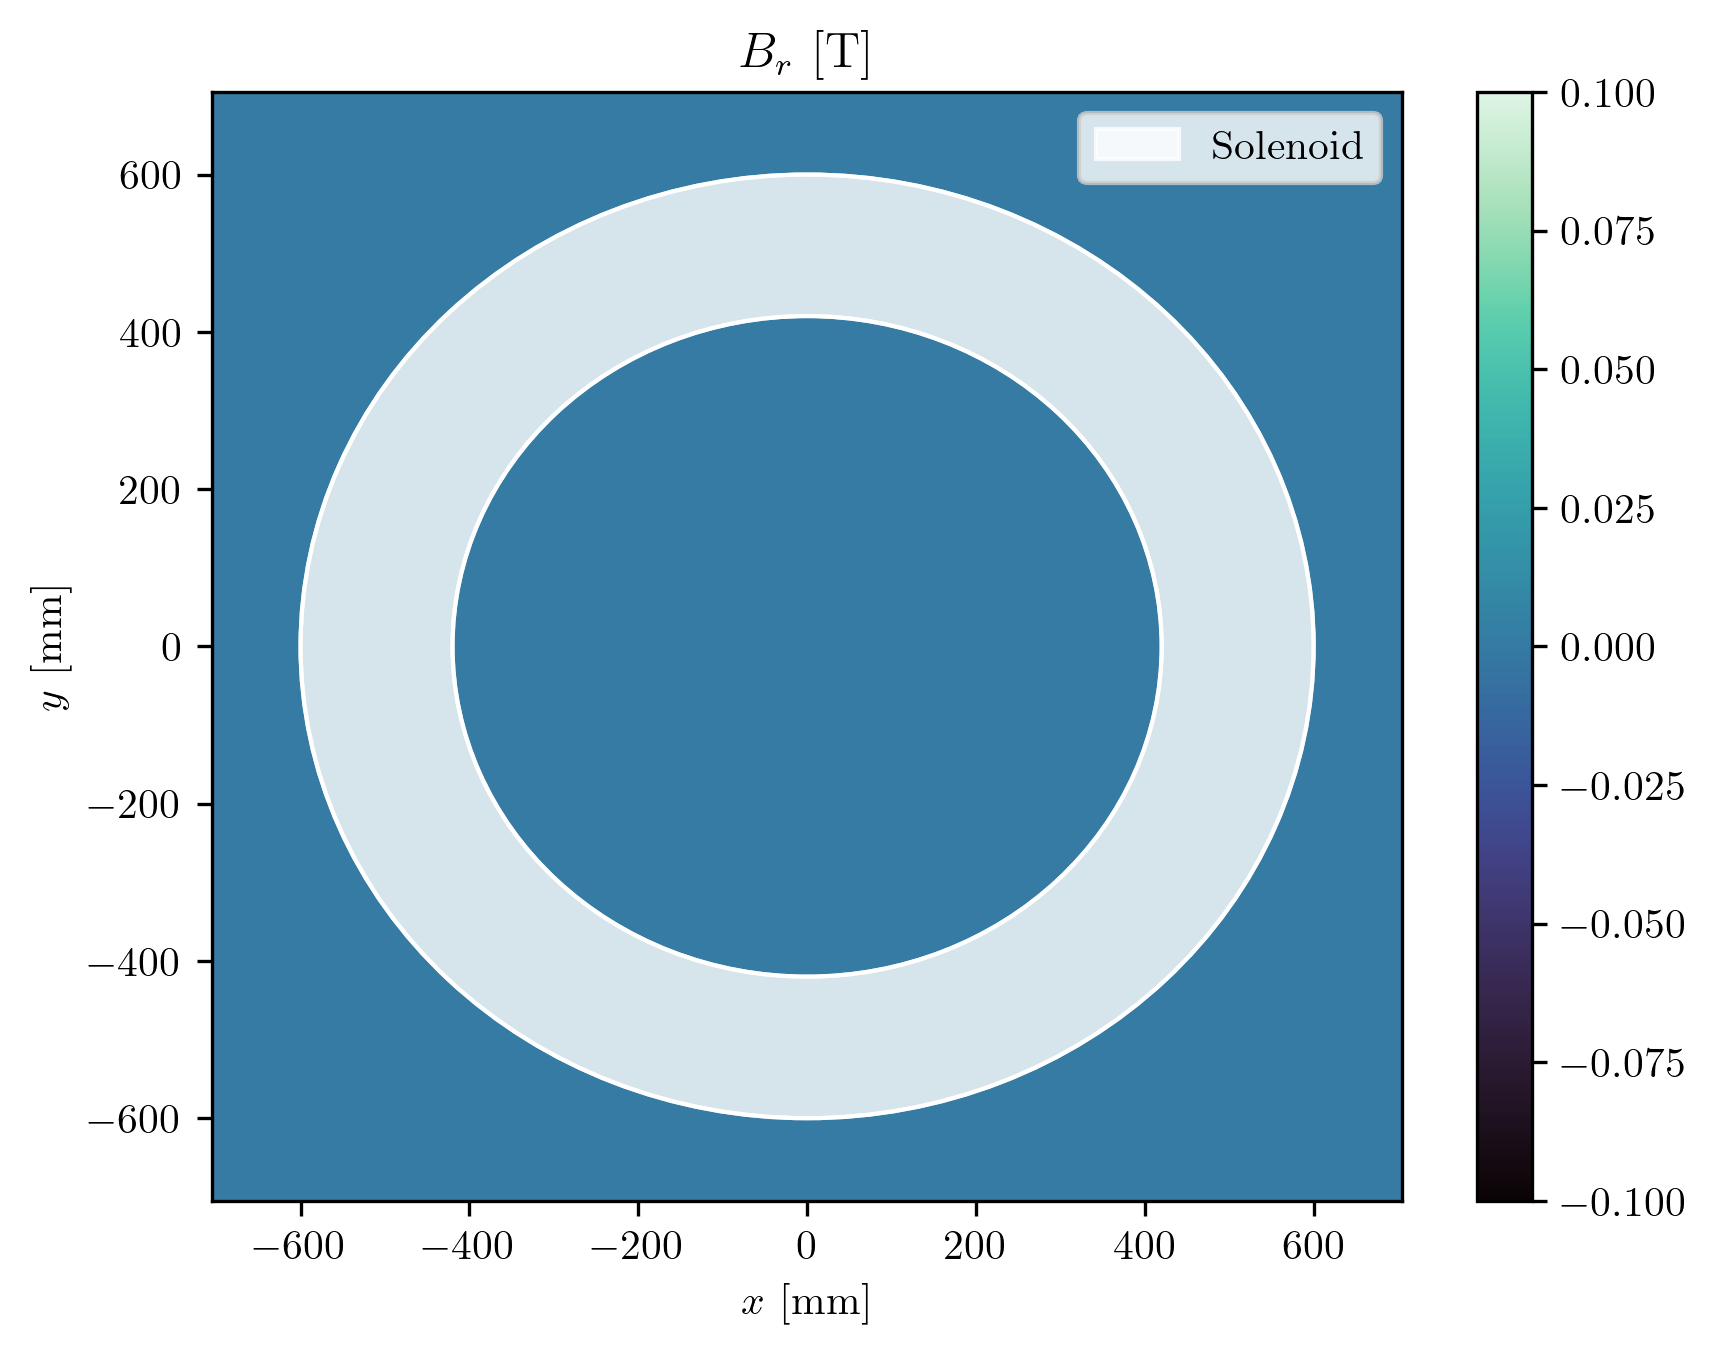

In [7]:
########## B_r ##########

Br_pivot = data_slice.pivot_table(index='y', columns='x', values='Br' )
Br_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto', vmin=data_slice['Br'].min(), vmax=data_slice['Br'].max())
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_r$ [T]')
plt.show()

### Animated field map for transverse slice along z

In [8]:
unique_z = np.sort(data_nopitch['z'].unique())
init_data = data_nopitch[data_nopitch['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

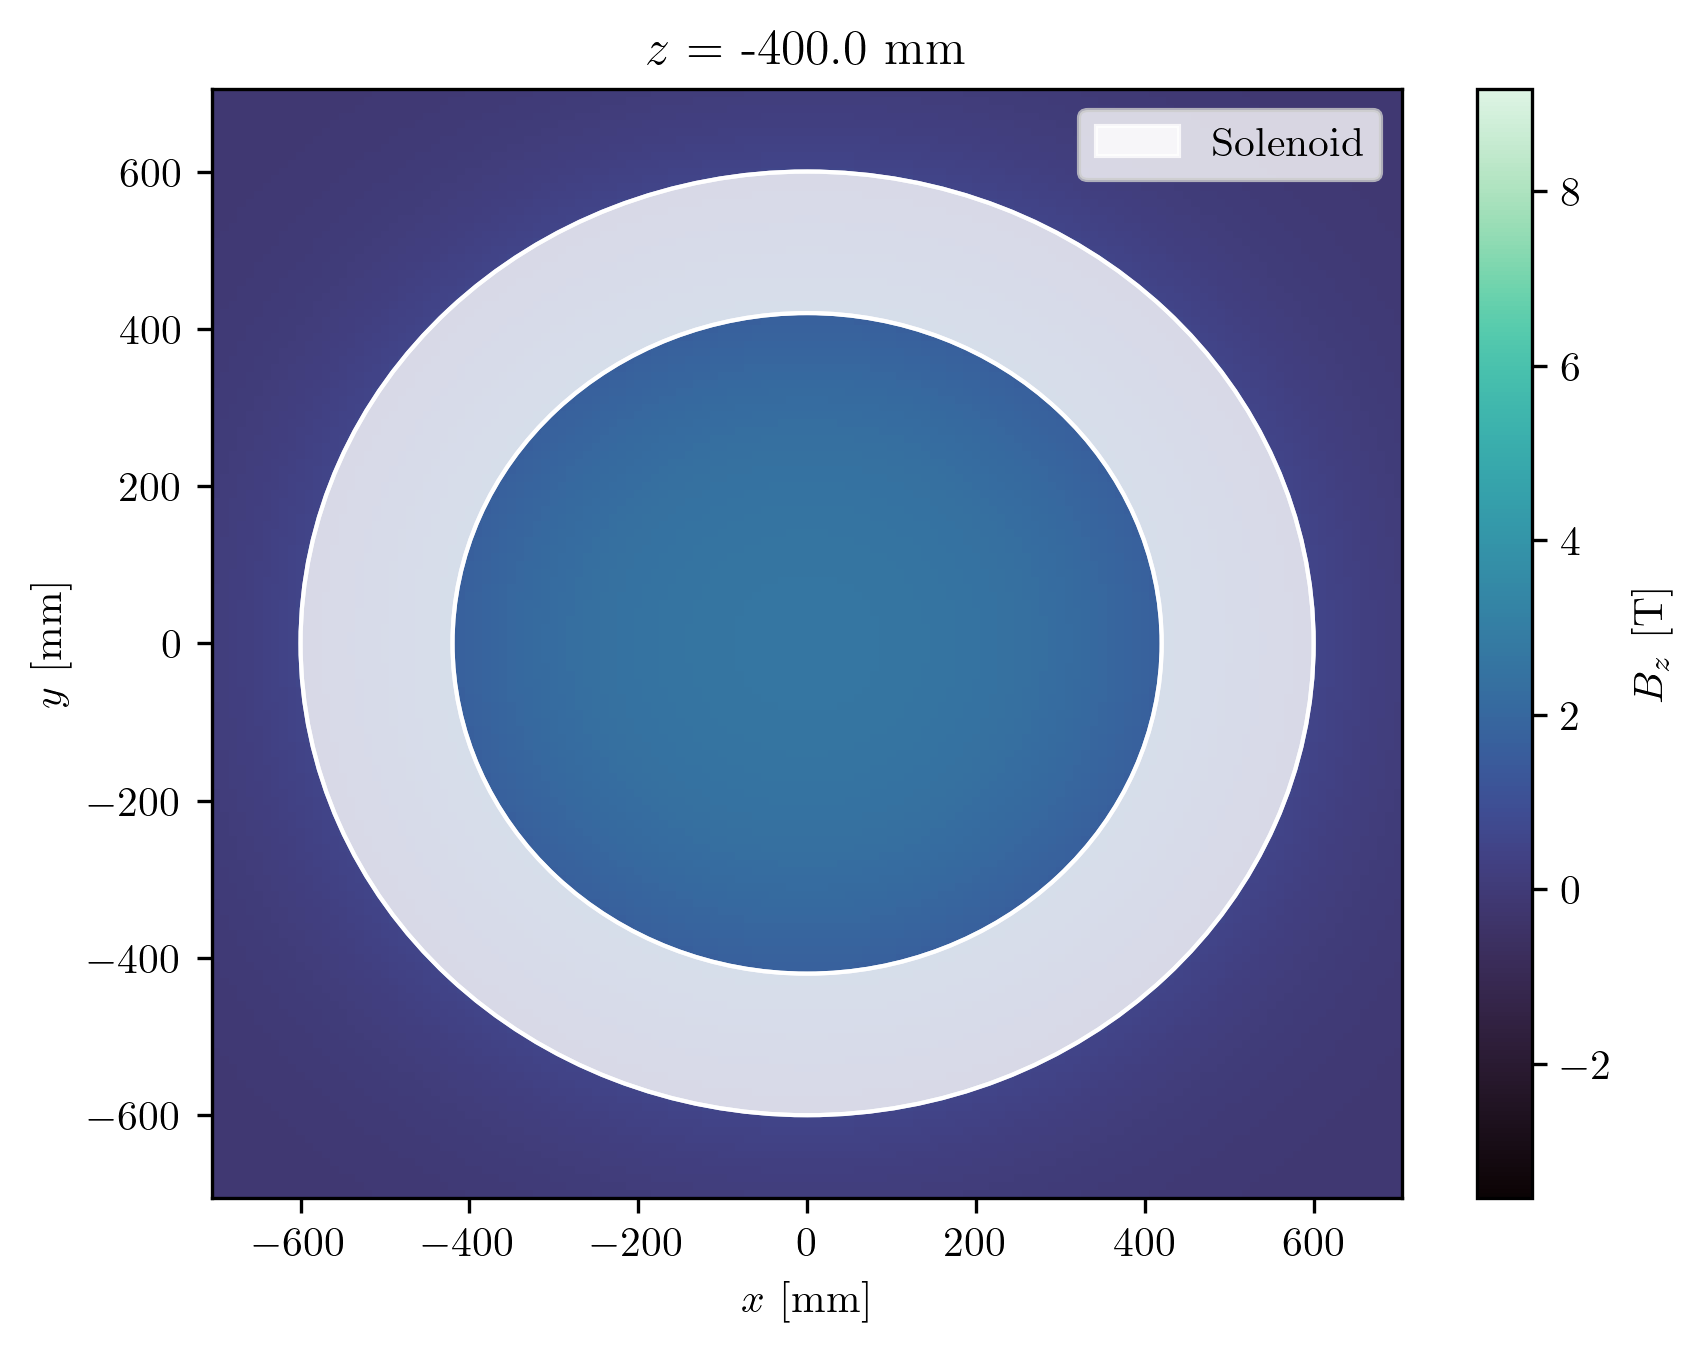

In [9]:
########## B_z ##########

Bz_init = init_data.pivot_table(index='y', columns='x', values='Bz').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_init, cmap=cmap, shading='auto', vmin=data_nopitch['Bz'].min(), vmax=data_nopitch['Bz'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_nopitch[data_nopitch['z'] == unique_z[frame]]
    Bz_grid = data_slice.pivot_table(index='y', columns='x', values='Bz').values
    pcm.set_array(Bz_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=True)
animation.save(ani_dir+'Bz_g4bl.gif', writer='pillow')

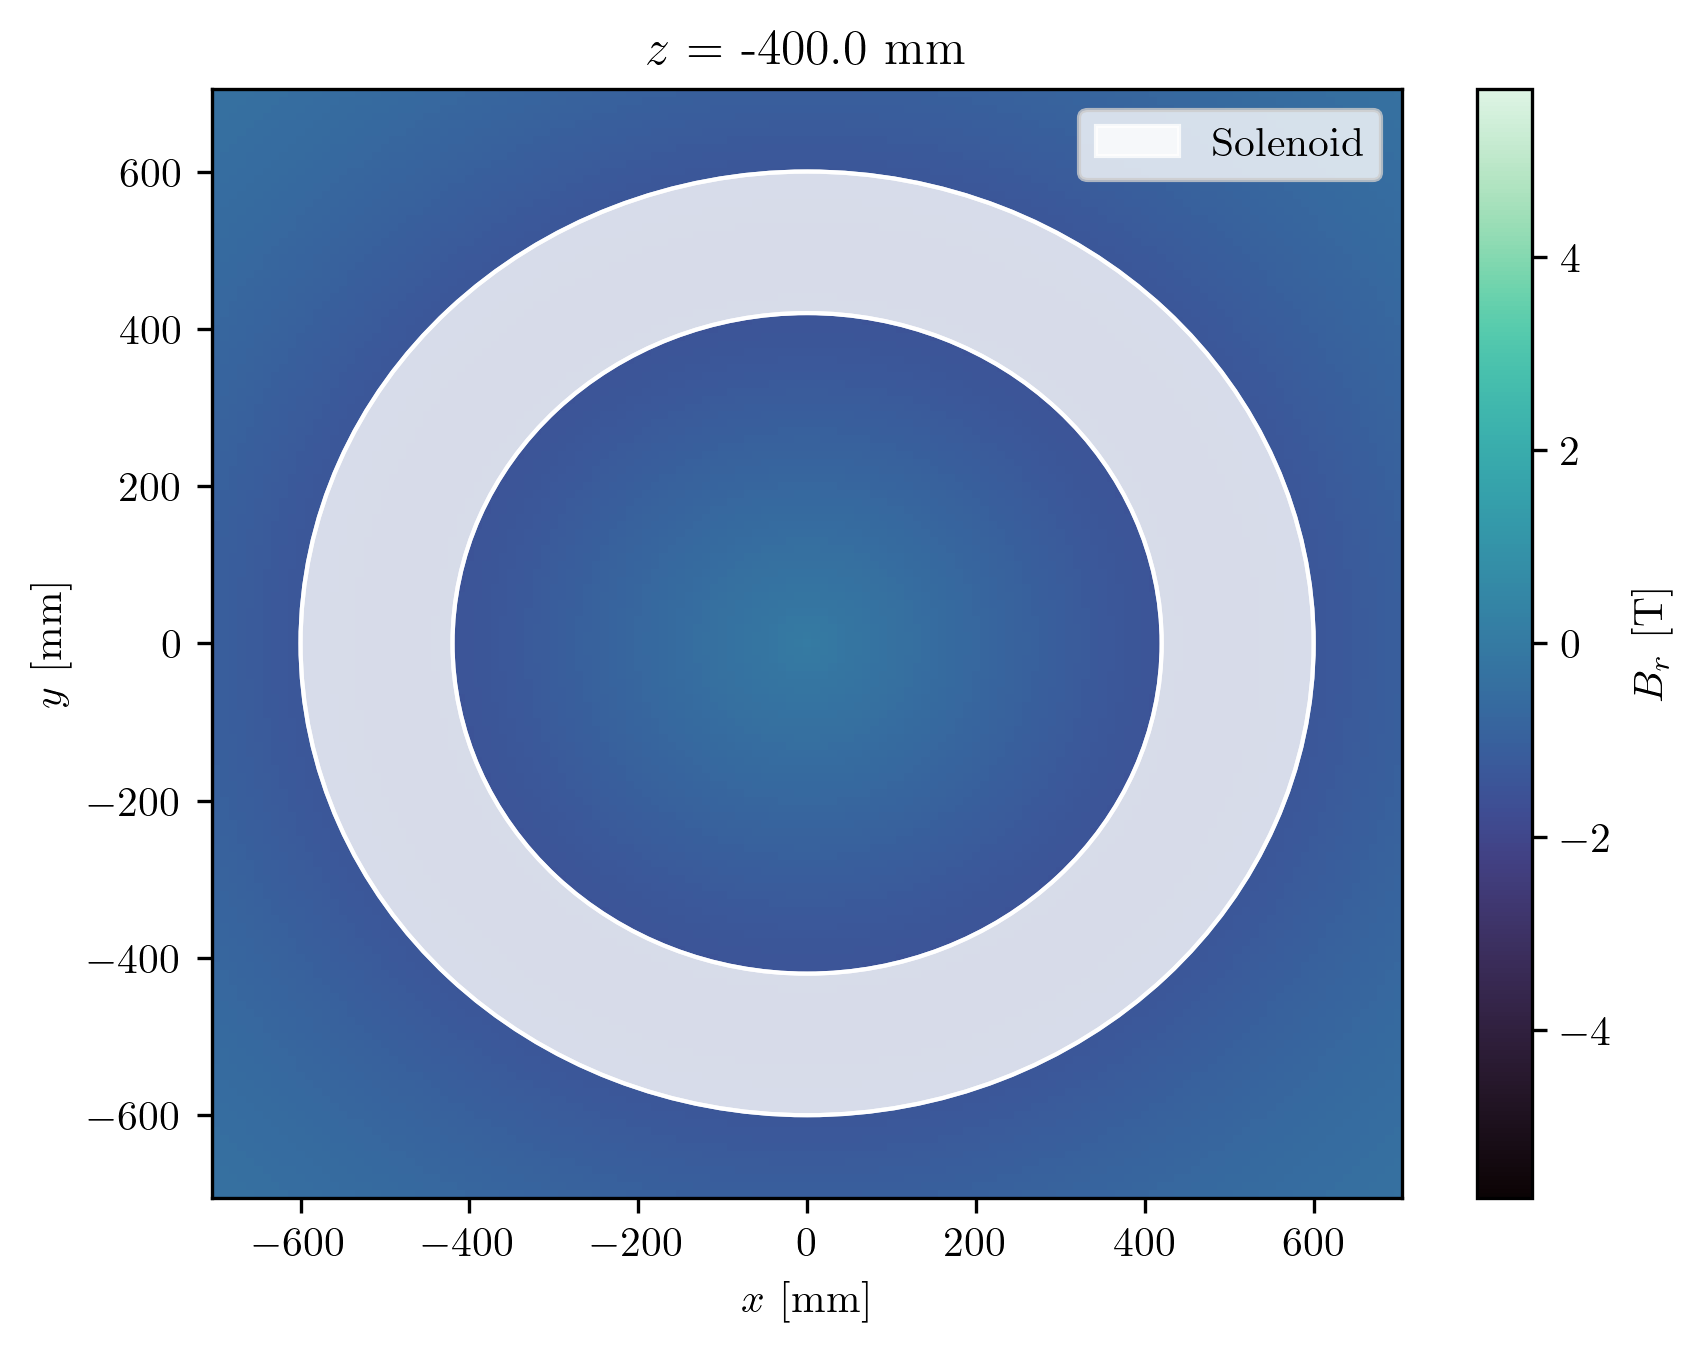

In [10]:
########## B_r ##########

Br_init = init_data.pivot_table(index='y', columns='x', values='Br').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap, shading='auto', vmin=data_nopitch['Br'].min(), vmax=data_nopitch['Br'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_nopitch[data_nopitch['z'] == unique_z[frame]]
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values
    pcm.set_array(Br_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=True)
animation.save(ani_dir+'Br_g4bl.gif', writer='pillow')

### Same plots -- now with visual of position w.r.t. solenoid

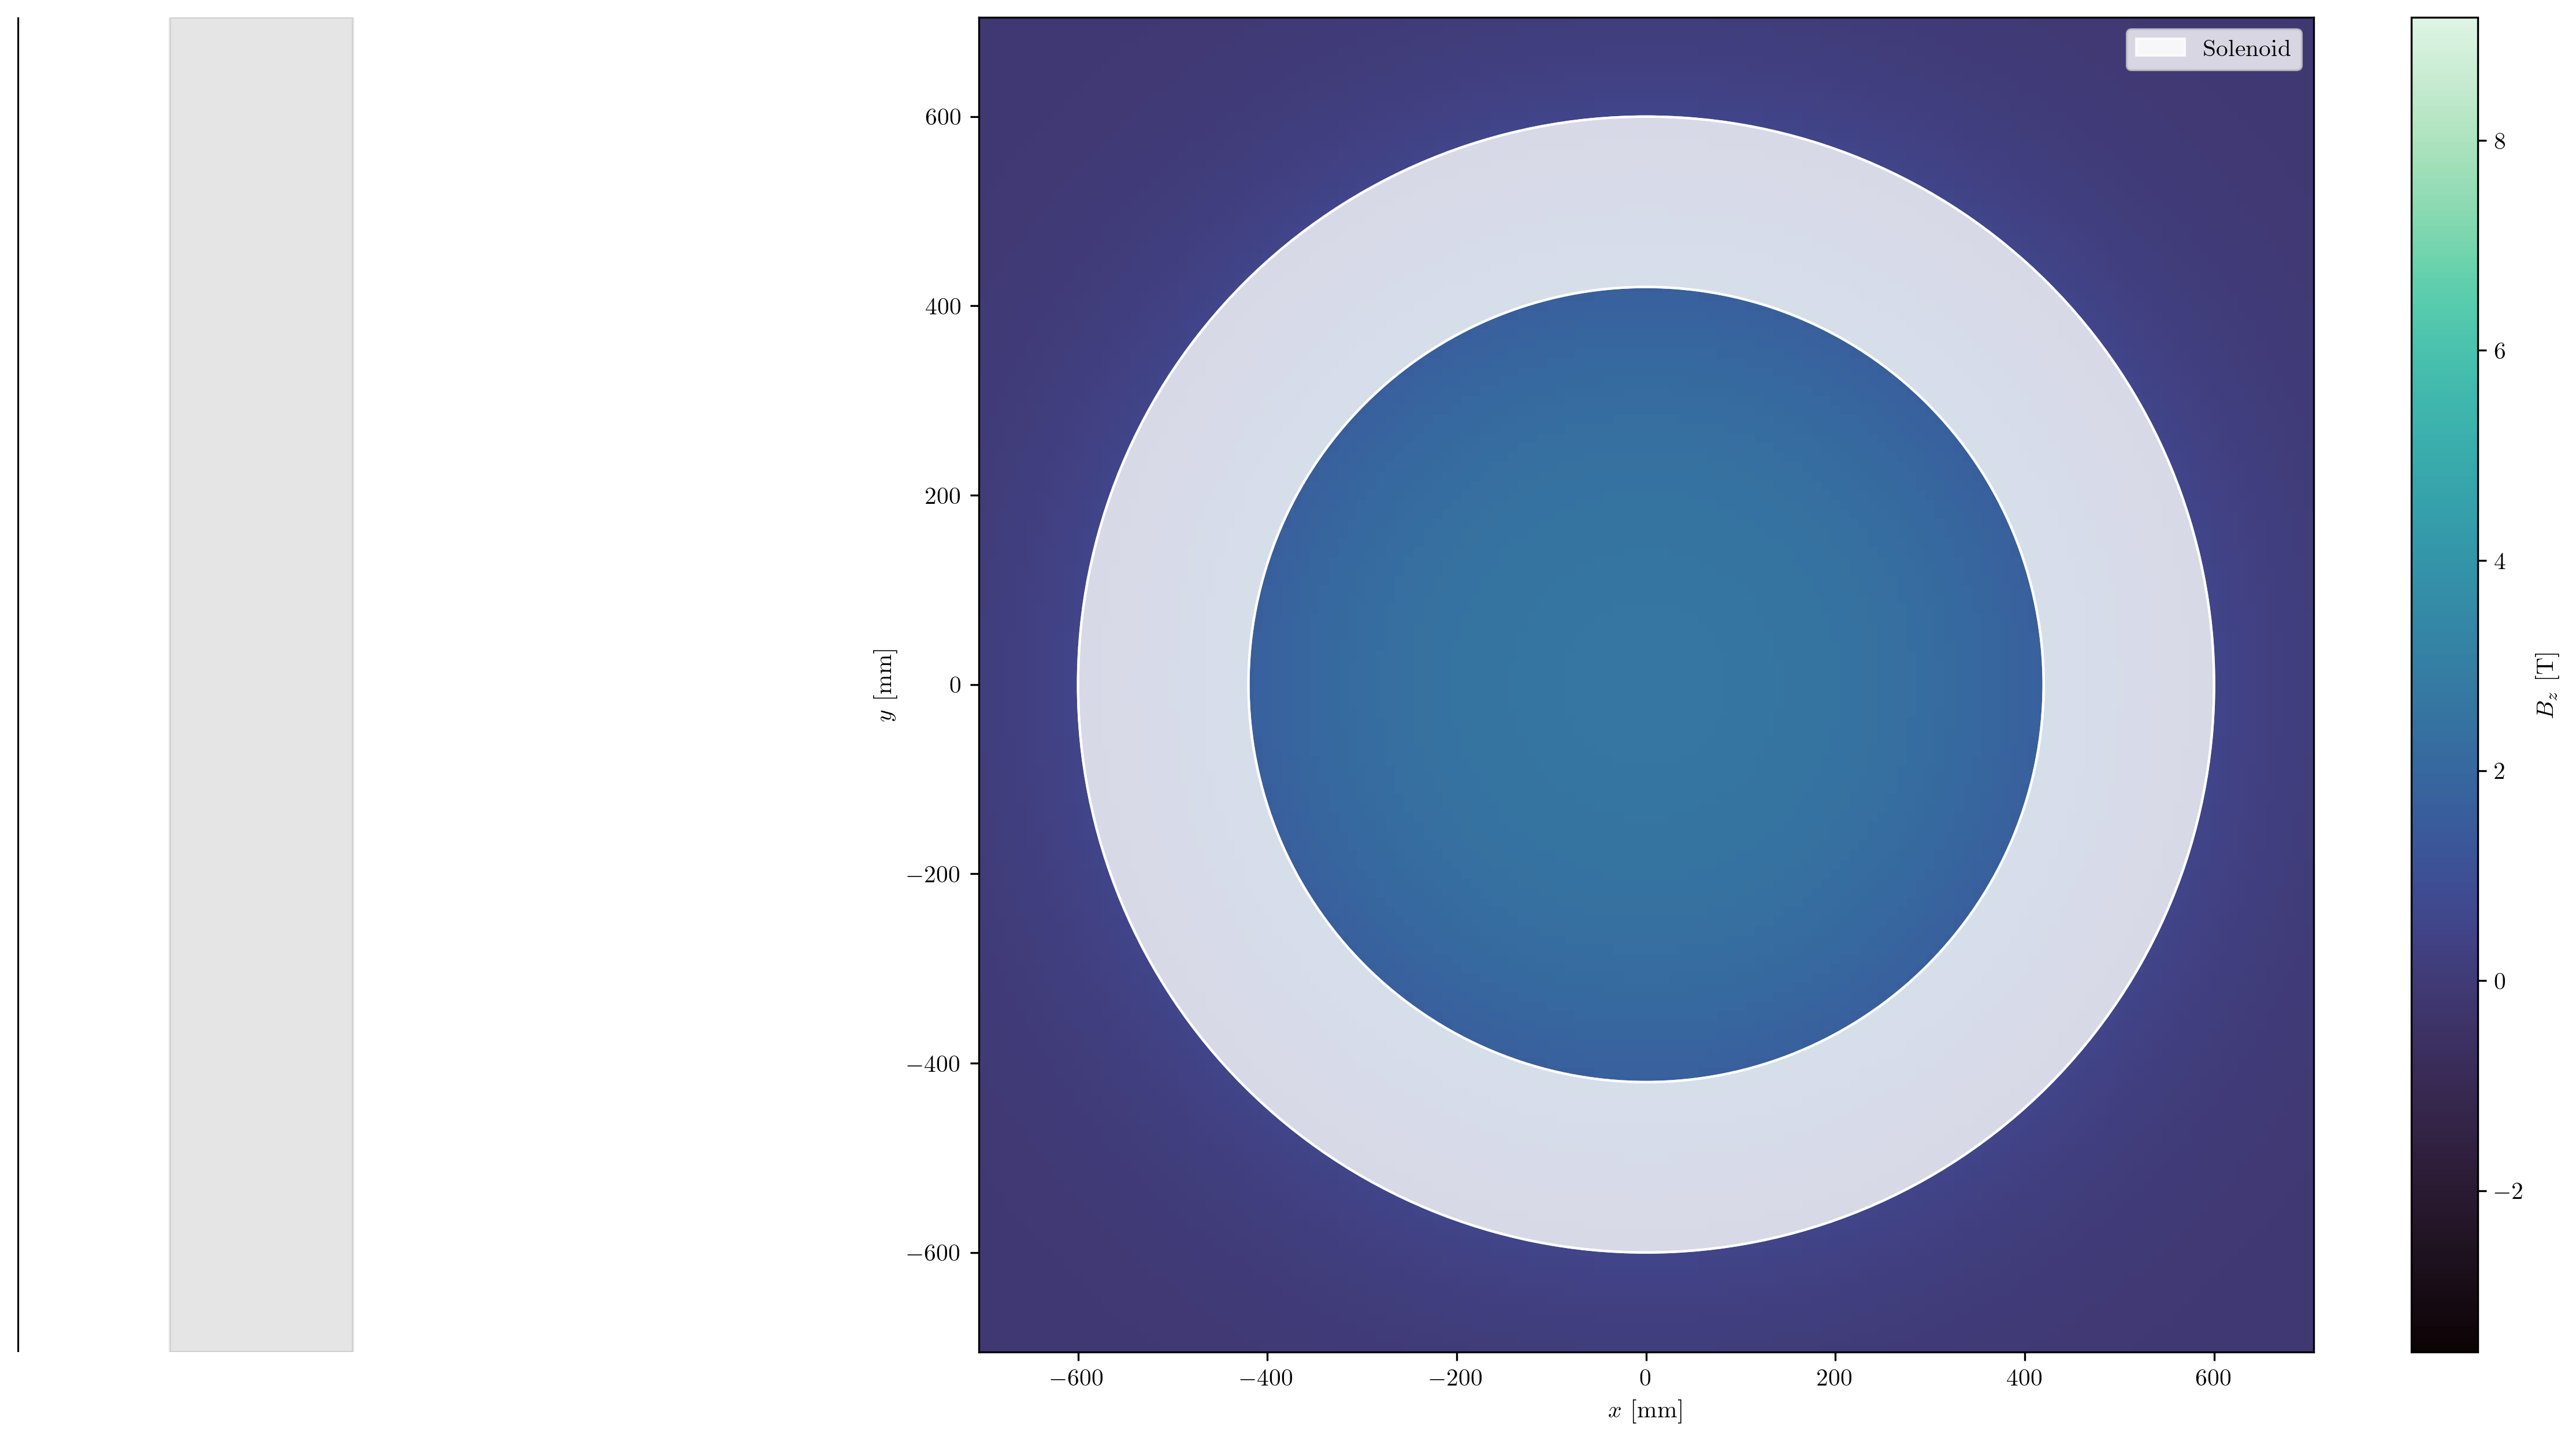

In [11]:
########## B_z ##########

fig, axs = plt.subplots(1, 2, figsize=(20,10), width_ratios=[1,4])
ax, ax2 = axs[1], axs[0]

arrayy = [0, 0]
ax2.set_xlim(-400, 400)
ax2.axvspan(xmin=-150, xmax=150, color='gray', alpha=0.2)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_frame_on(False)
vline = ax2.axvline(x=unique_z[0], color='black')

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_init, cmap=cmap, shading='auto', vmin=data_nopitch['Bz'].min(), vmax=data_nopitch['Bz'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')
plot_solenoid(ax)
ax.set_aspect('equal')

def animate(frame):

    z_val = unique_z[frame]

    vline.set_xdata([z_val])

    data_slice = data_nopitch[data_nopitch['z'] == unique_z[frame]]
    Bz_grid = data_slice.pivot_table(index='y', columns='x', values='Bz').values
    pcm.set_array(Bz_grid.ravel())

    return [pcm, vline]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Bz_g4bl_subplot.gif', writer='pillow')

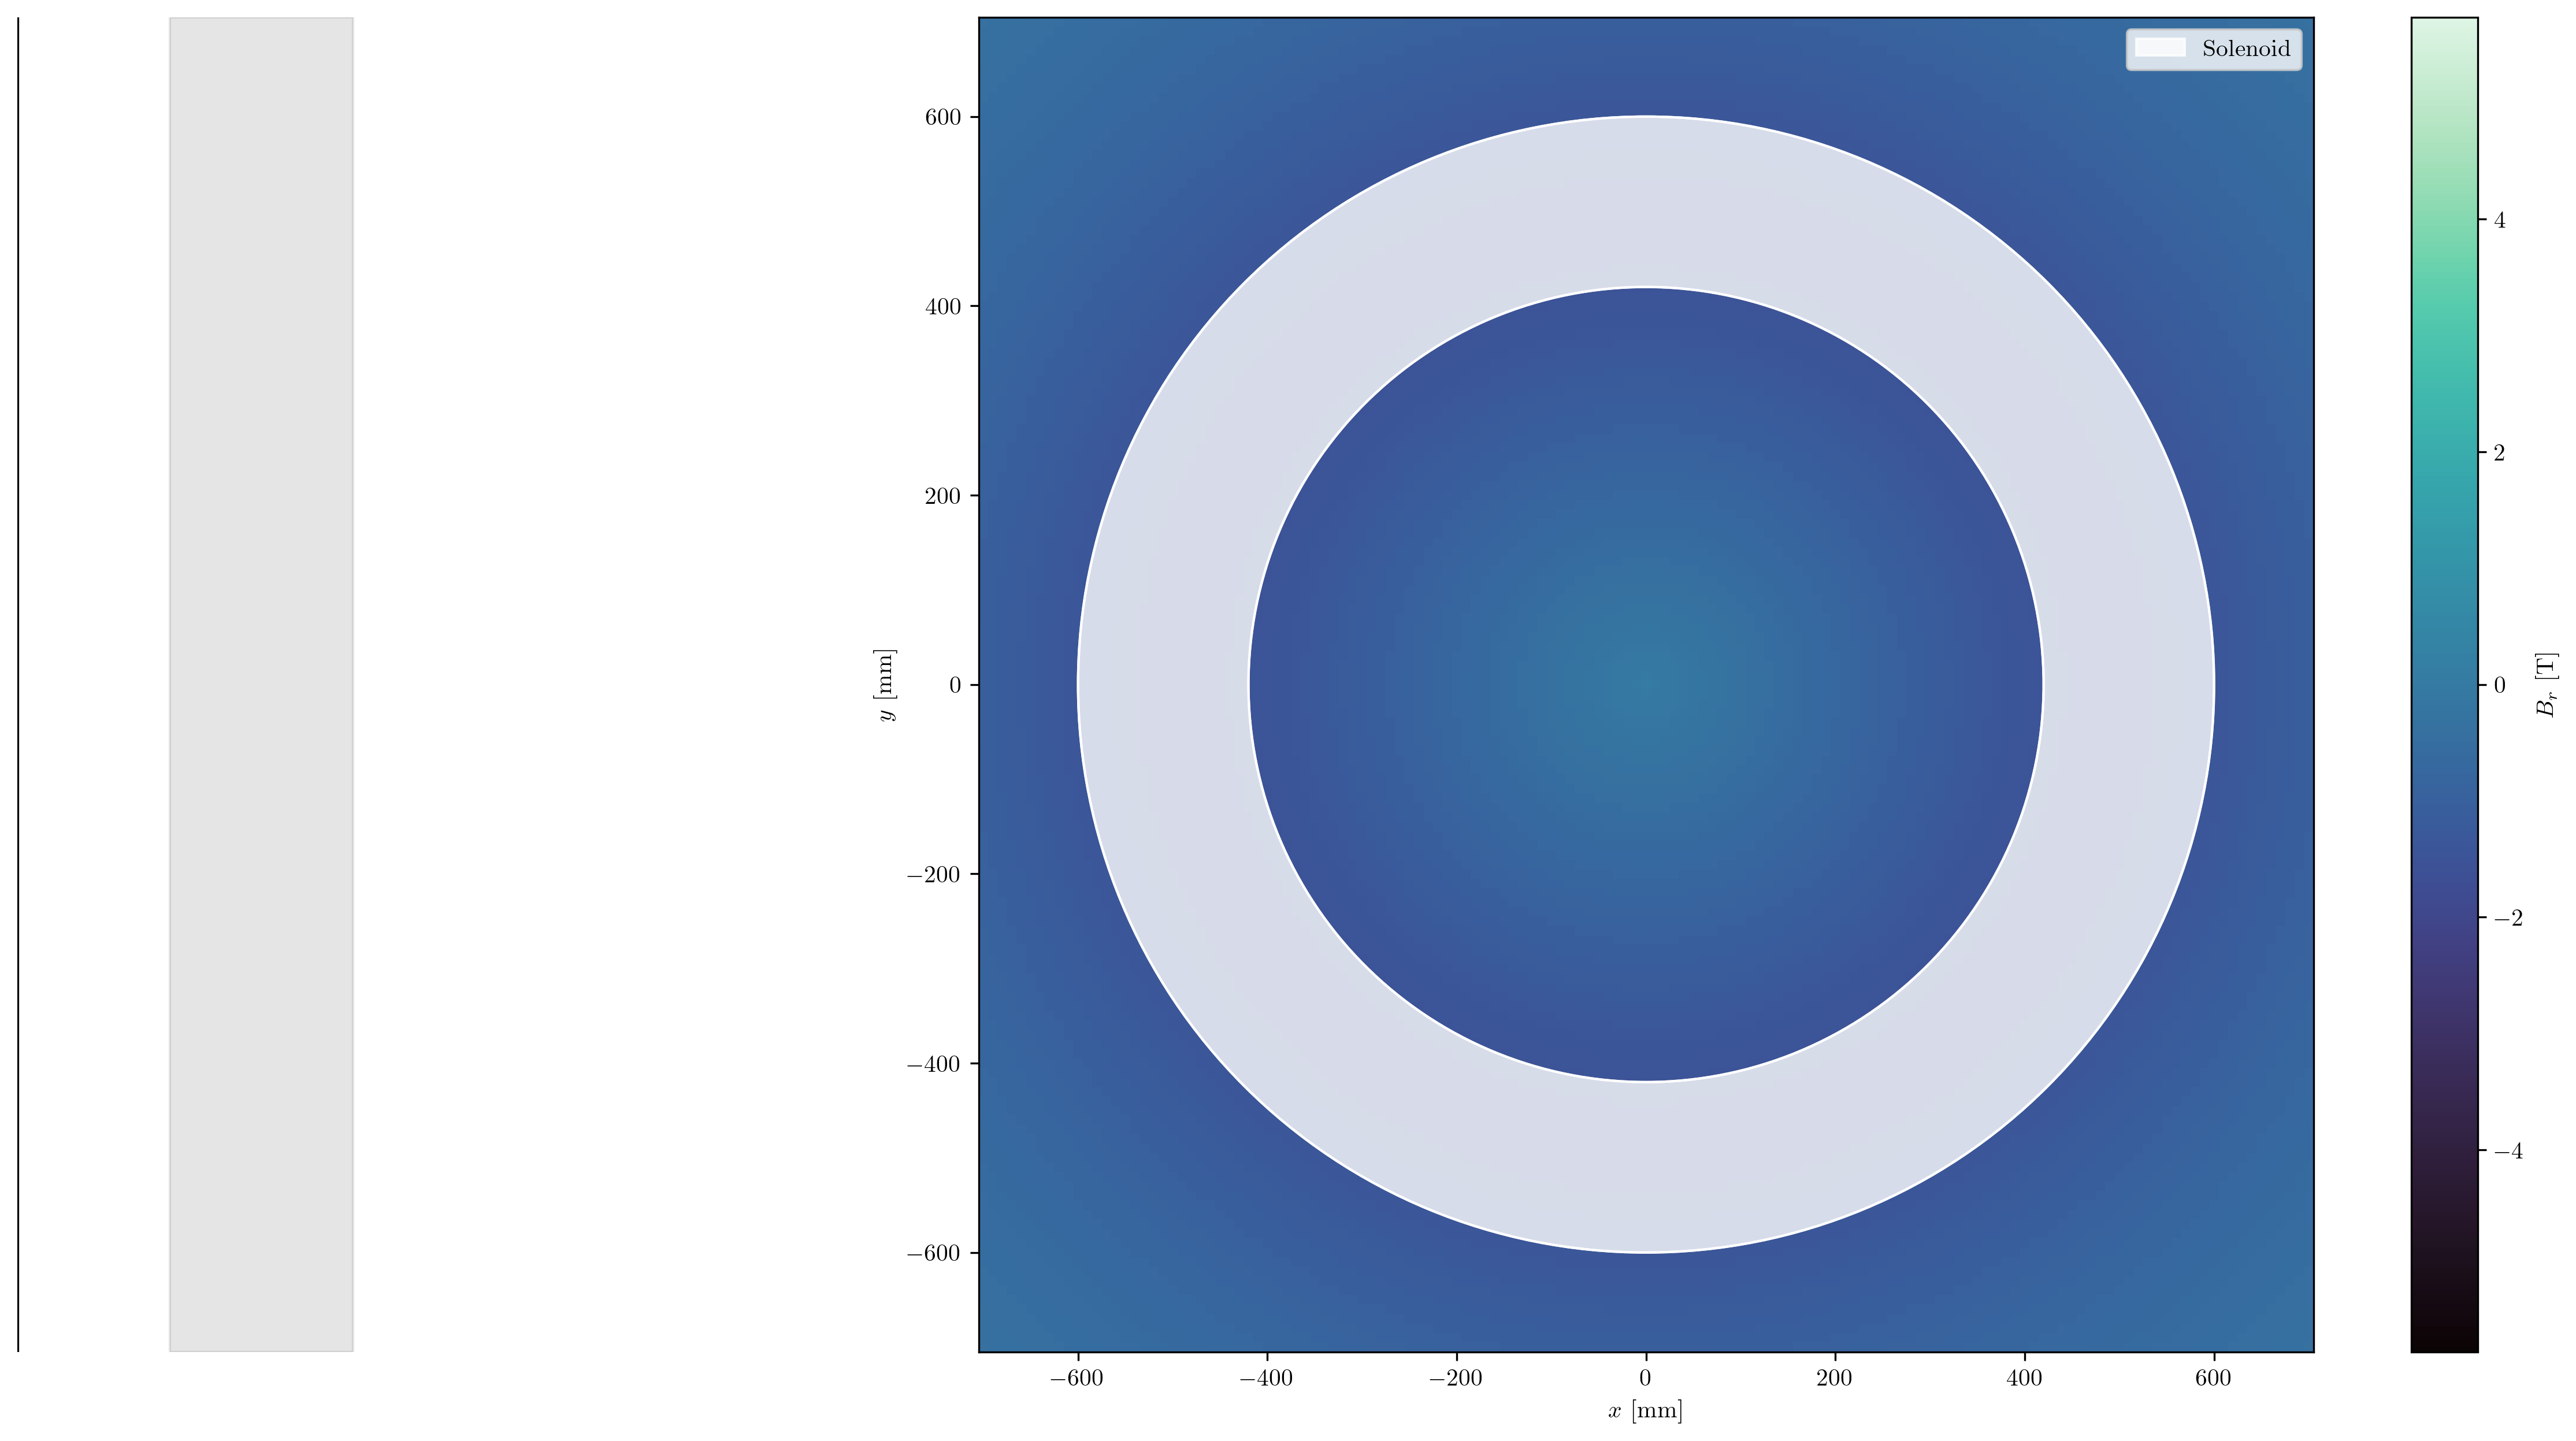

In [12]:
########## B_r ##########

fig, axs = plt.subplots(1, 2, figsize=(20,10), width_ratios=[1,4])
ax, ax2 = axs[1], axs[0]

arrayy = [0, 0]
ax2.set_xlim(-400, 400)
ax2.axvspan(xmin=-150, xmax=150, color='gray', alpha=0.2)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_frame_on(False)
vline = ax2.axvline(x=unique_z[0], color='black')

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap, shading='auto', vmin=data_nopitch['Br'].min(), vmax=data_nopitch['Br'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')
plot_solenoid(ax)
ax.set_aspect('equal')

def animate(frame):

    z_val = unique_z[frame]

    vline.set_xdata([z_val])

    data_slice = data_nopitch[data_nopitch['z'] == unique_z[frame]]
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values
    pcm.set_array(Br_grid.ravel())

    return [pcm, vline]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_g4bl_subplot.gif', writer='pillow')

## Single solenoid -- with pitch

### Plot transverse slice at given z

In [ ]:
data_pitch = readFieldMapData('fieldmap_pitch.txt')

In [47]:
z_val = 0.0

data_slice = data_pitch[data_pitch['z'] == z_val]

x_unique = np.sort(data_slice['x'].unique())
y_unique = np.sort(data_slice['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

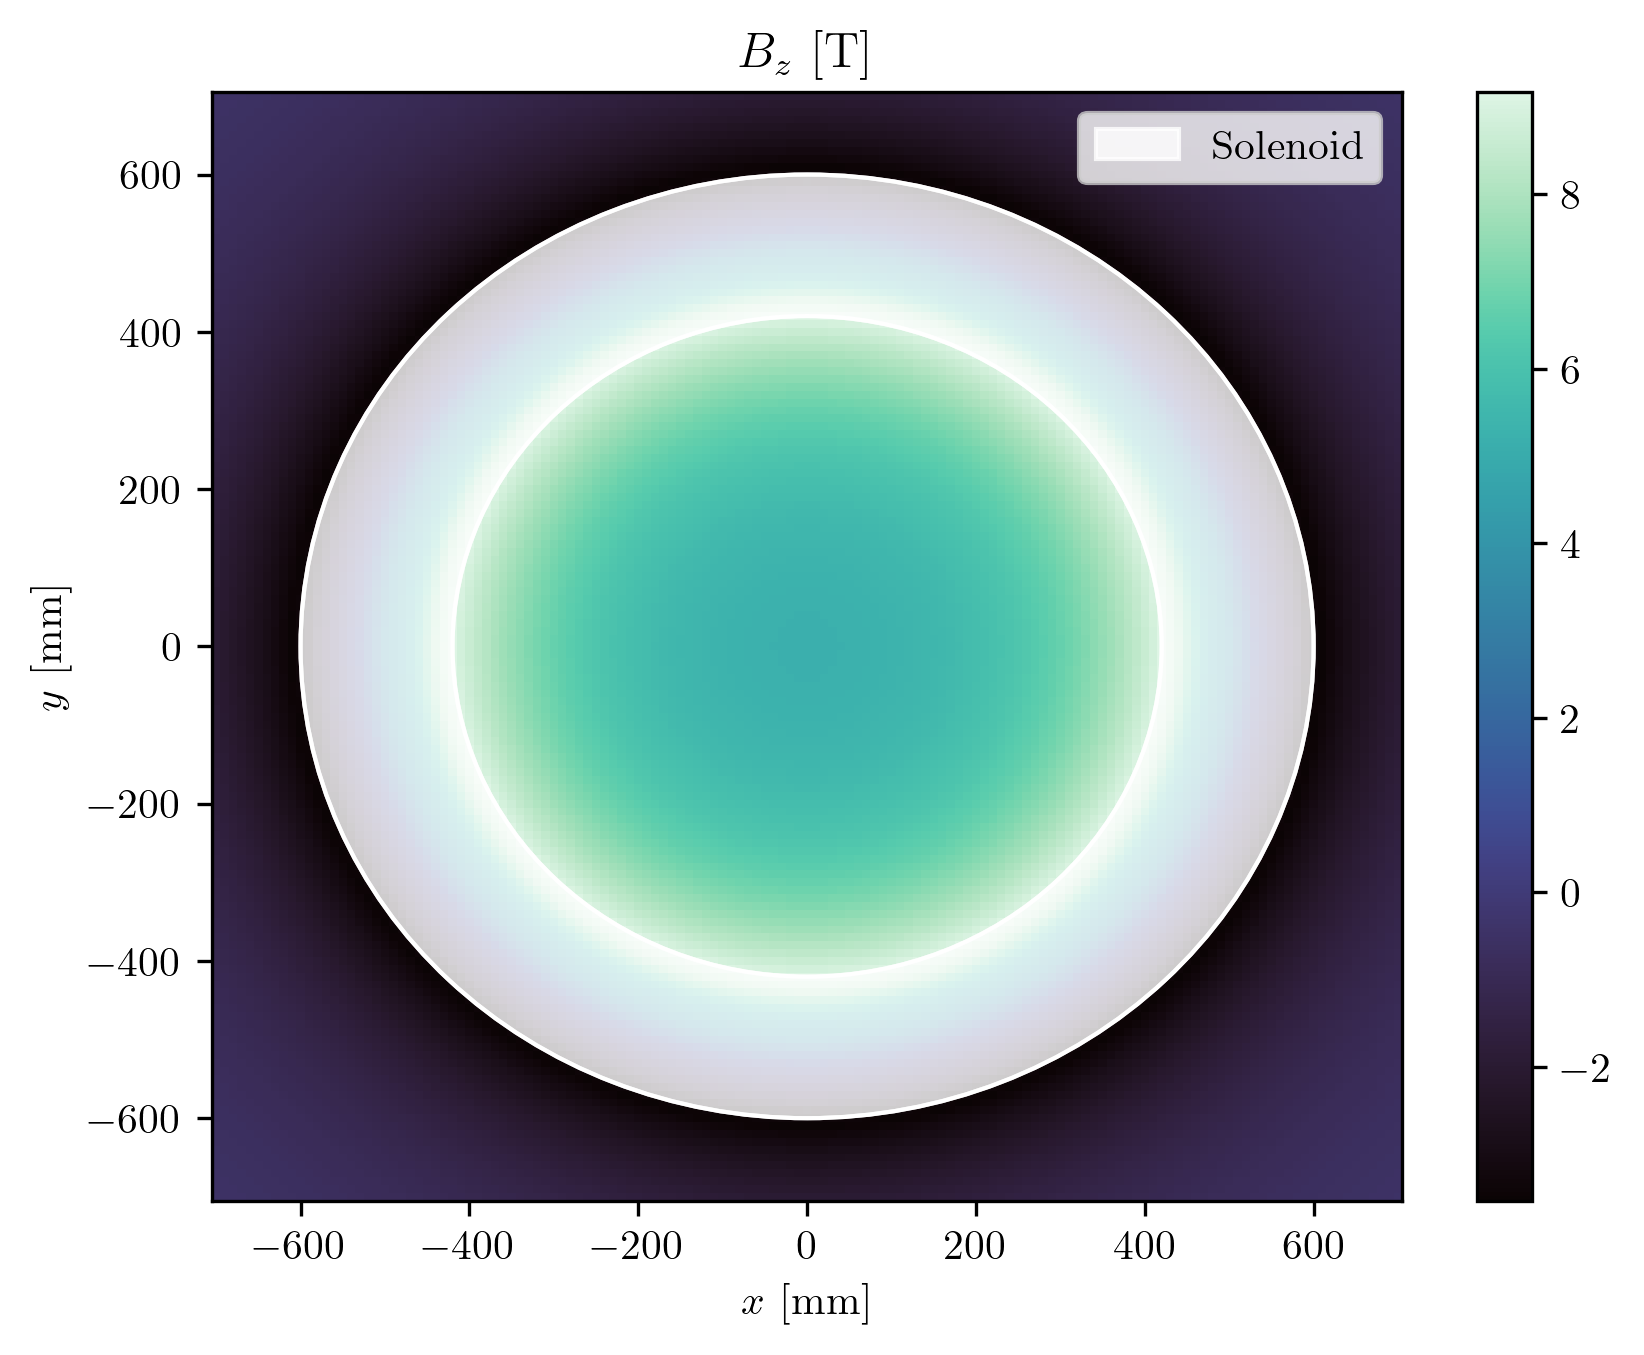

In [48]:
########## B_z ##########

Bz_pivot = data_slice.pivot_table(index='y', columns='x', values='Bz' )
Bz_grid = Bz_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_grid, cmap=cmap, shading='auto', vmin=data_slice['Bz'].min(), vmax=data_slice['Bz'].max())
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_z$ [T]')
plt.show()

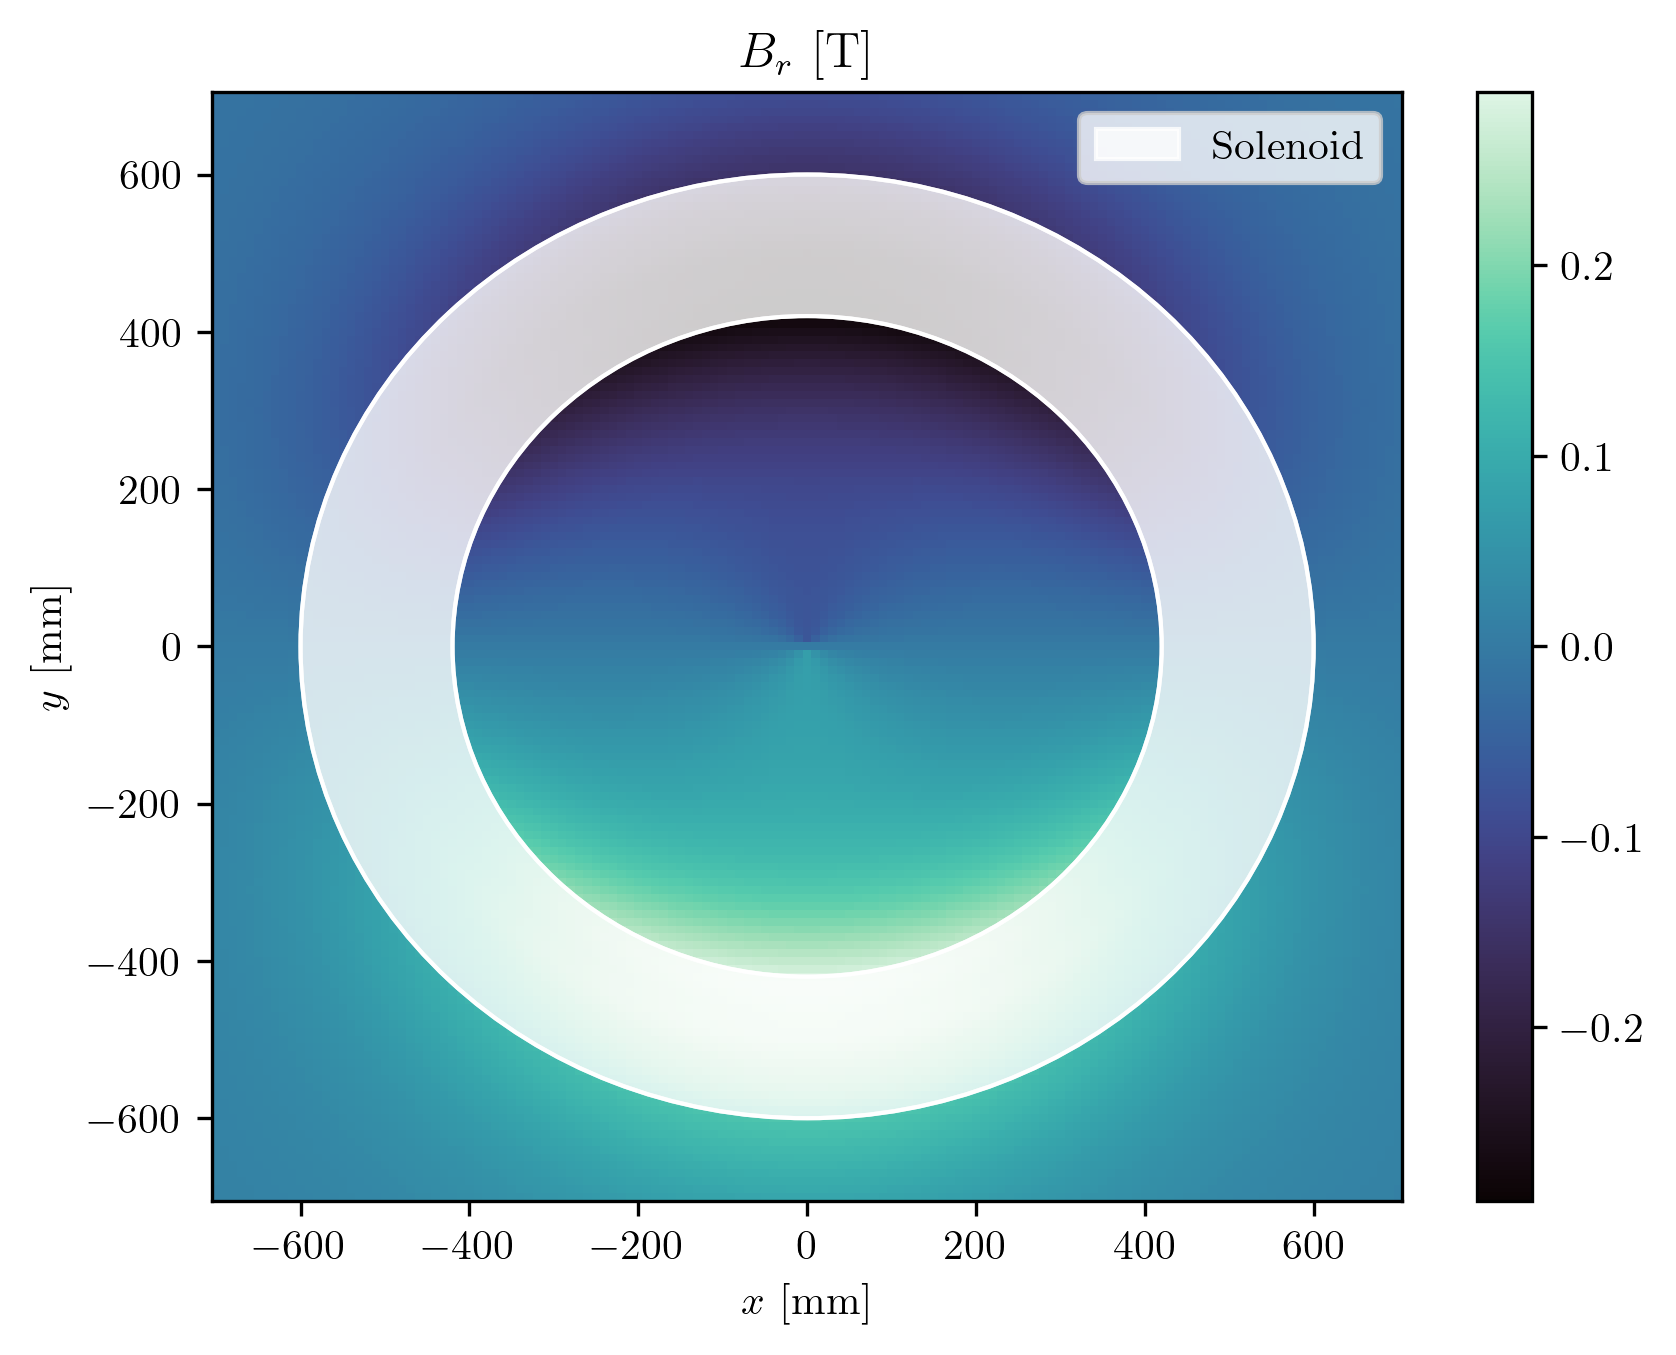

In [49]:
########## B_r ##########

Br_pivot = data_slice.pivot_table(index='y', columns='x', values='Br' )
Br_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto')
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_r$ [T]')
plt.show()

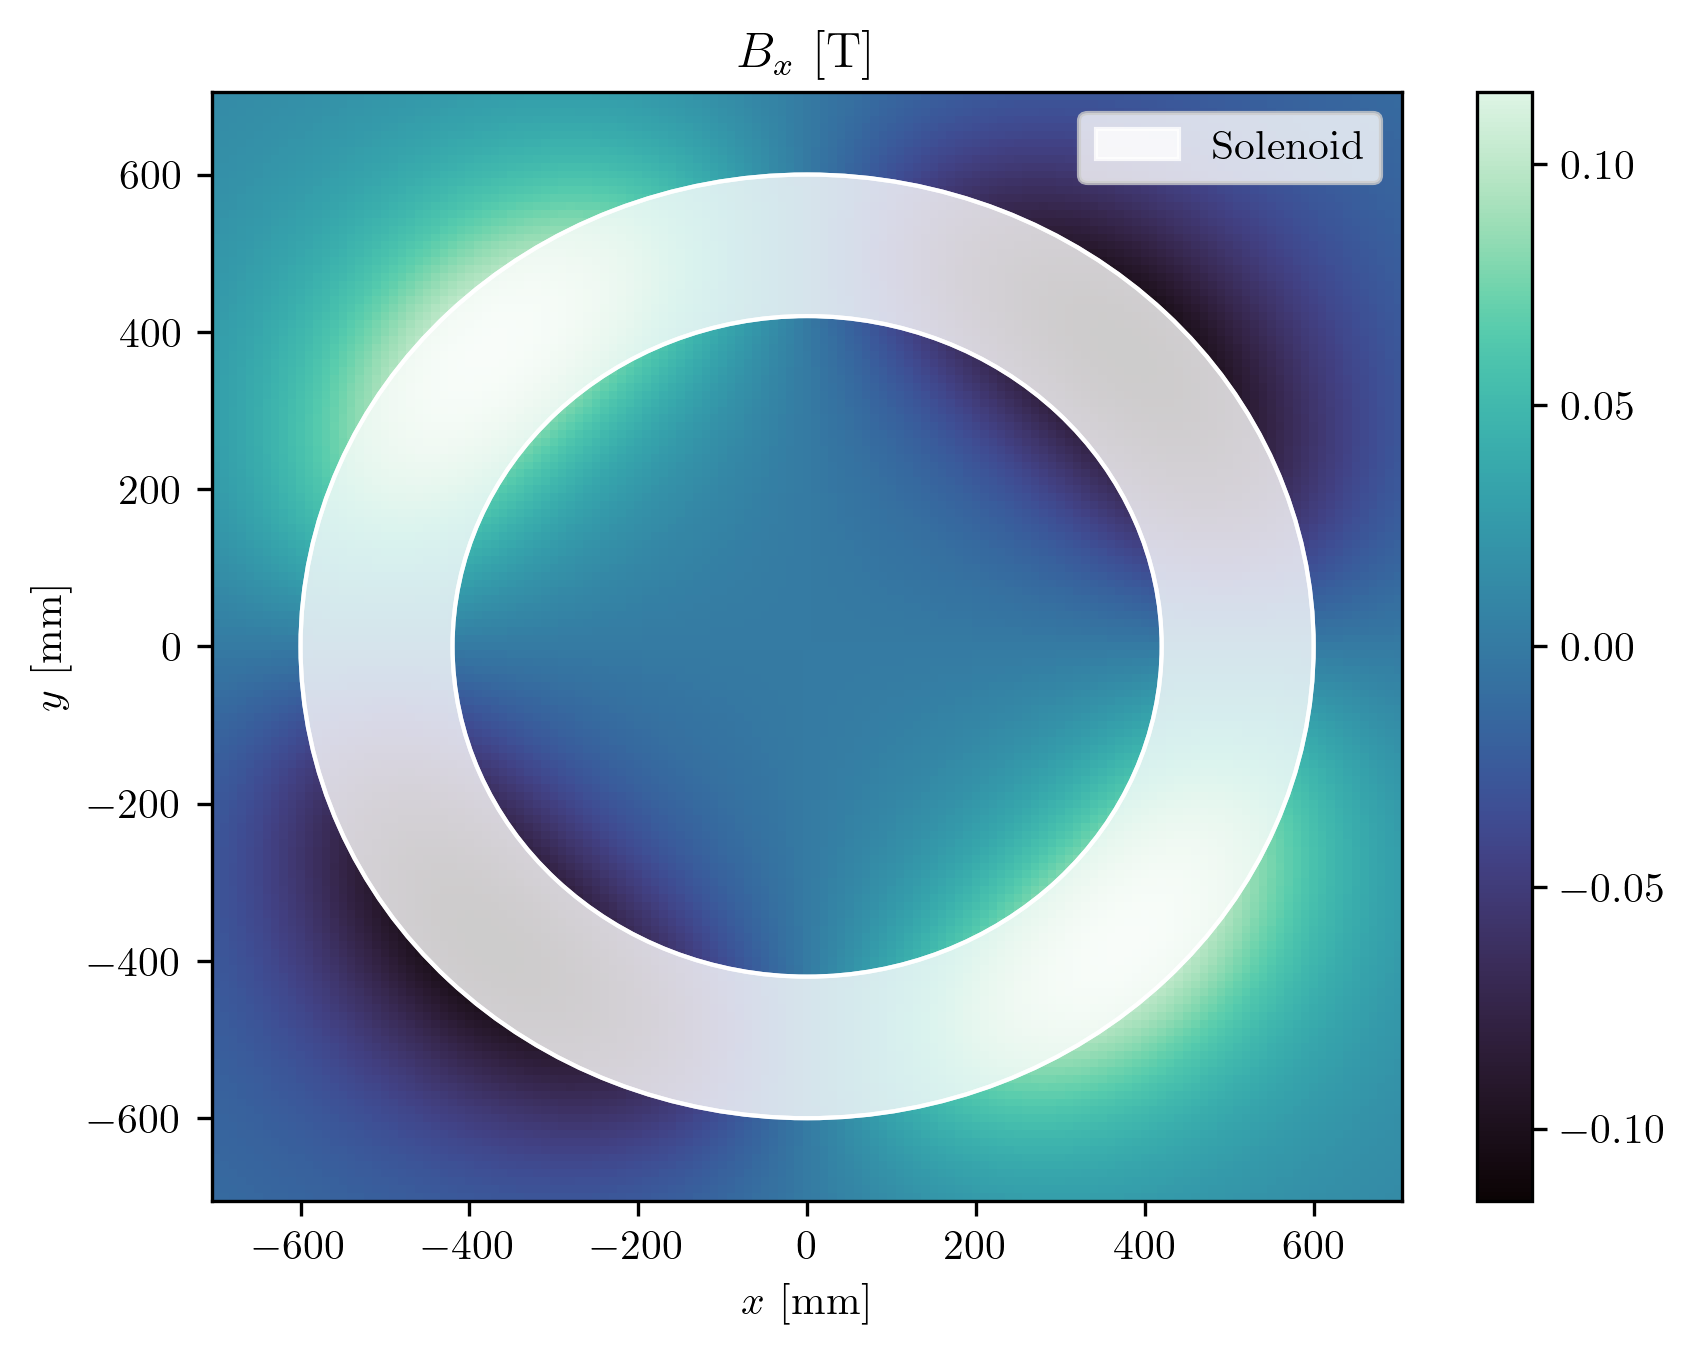

In [50]:
########## B_x ##########

Bx_pivot = data_slice.pivot_table(index='y', columns='x', values='Bx' )
Bx_grid = Bx_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_grid, cmap=cmap, shading='auto')
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_x$ [T]')
plt.show()

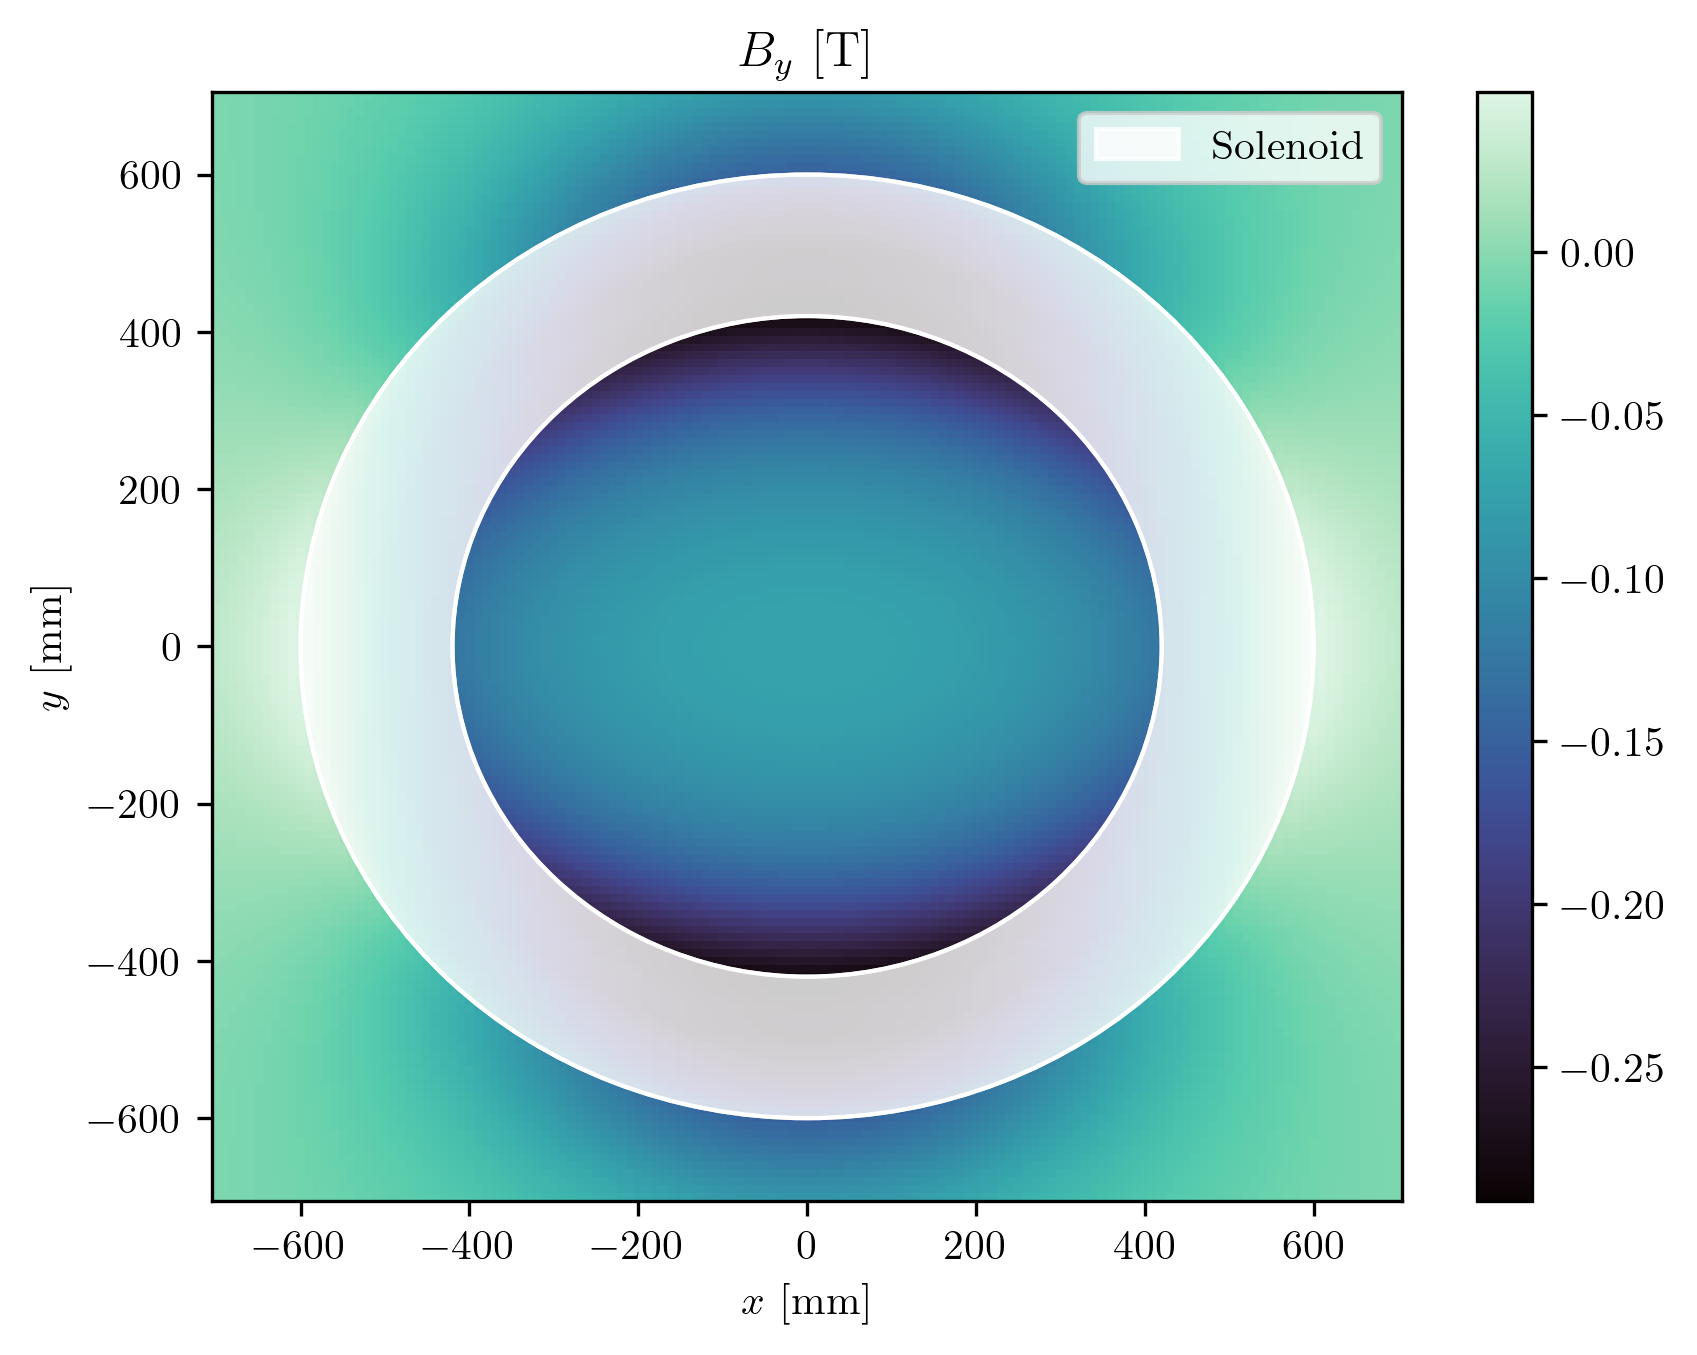

In [51]:
########## B_y ##########

By_pivot = data_slice.pivot_table(index='y', columns='x', values='By' )
By_grid = By_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_grid, cmap=cmap, shading='auto')
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_y$ [T]')
plt.show()

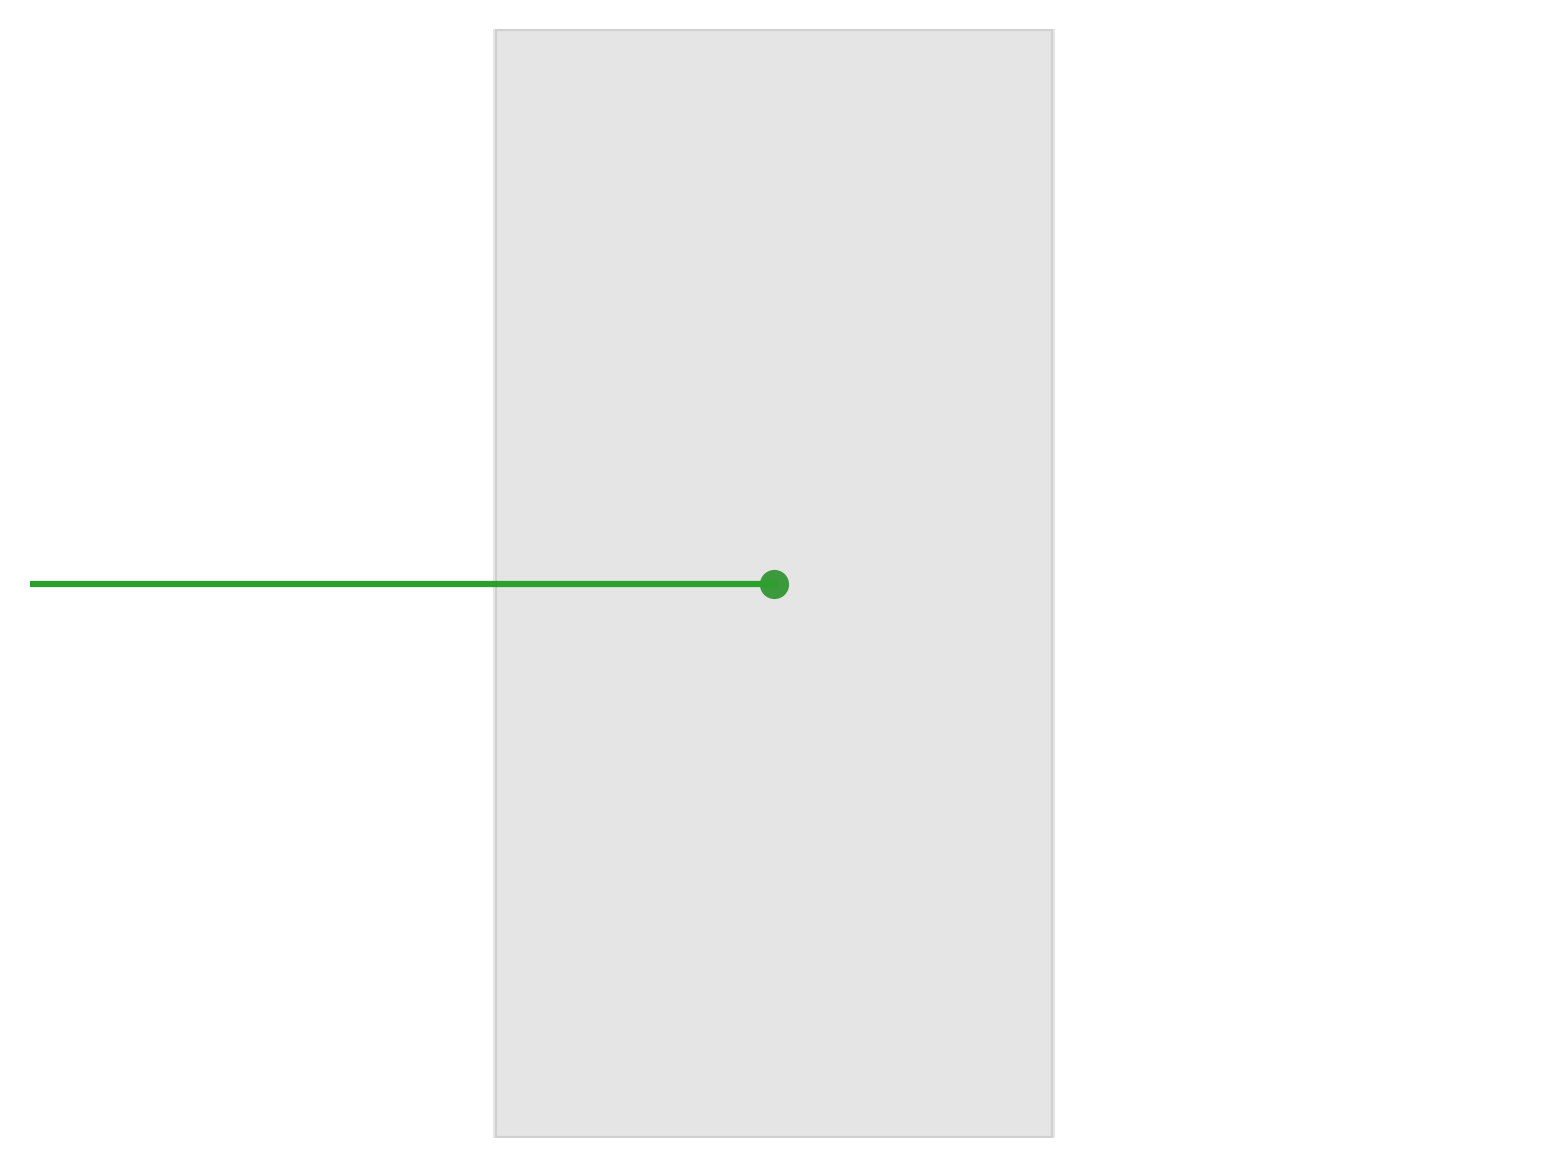

In [52]:
fig, ax = plt.subplots()
ybounds = [0, 0]
xbounds = [-400, z_val]
plt.xlim(-400, 400)
plt.scatter(z_val, 0, color='tab:green')
plt.plot(xbounds, ybounds, color='tab:green')
plt.axvspan(xmin=-150, xmax=150, color='gray', alpha=0.2, label='Solenoid')
plt.yticks([])
plt.xticks([])
ax.set_frame_on(False)
plt.show()

### Animated field map for transverse slice along z

In [20]:
unique_z = np.sort(data_pitch['z'].unique())
init_data = data_pitch[data_pitch['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

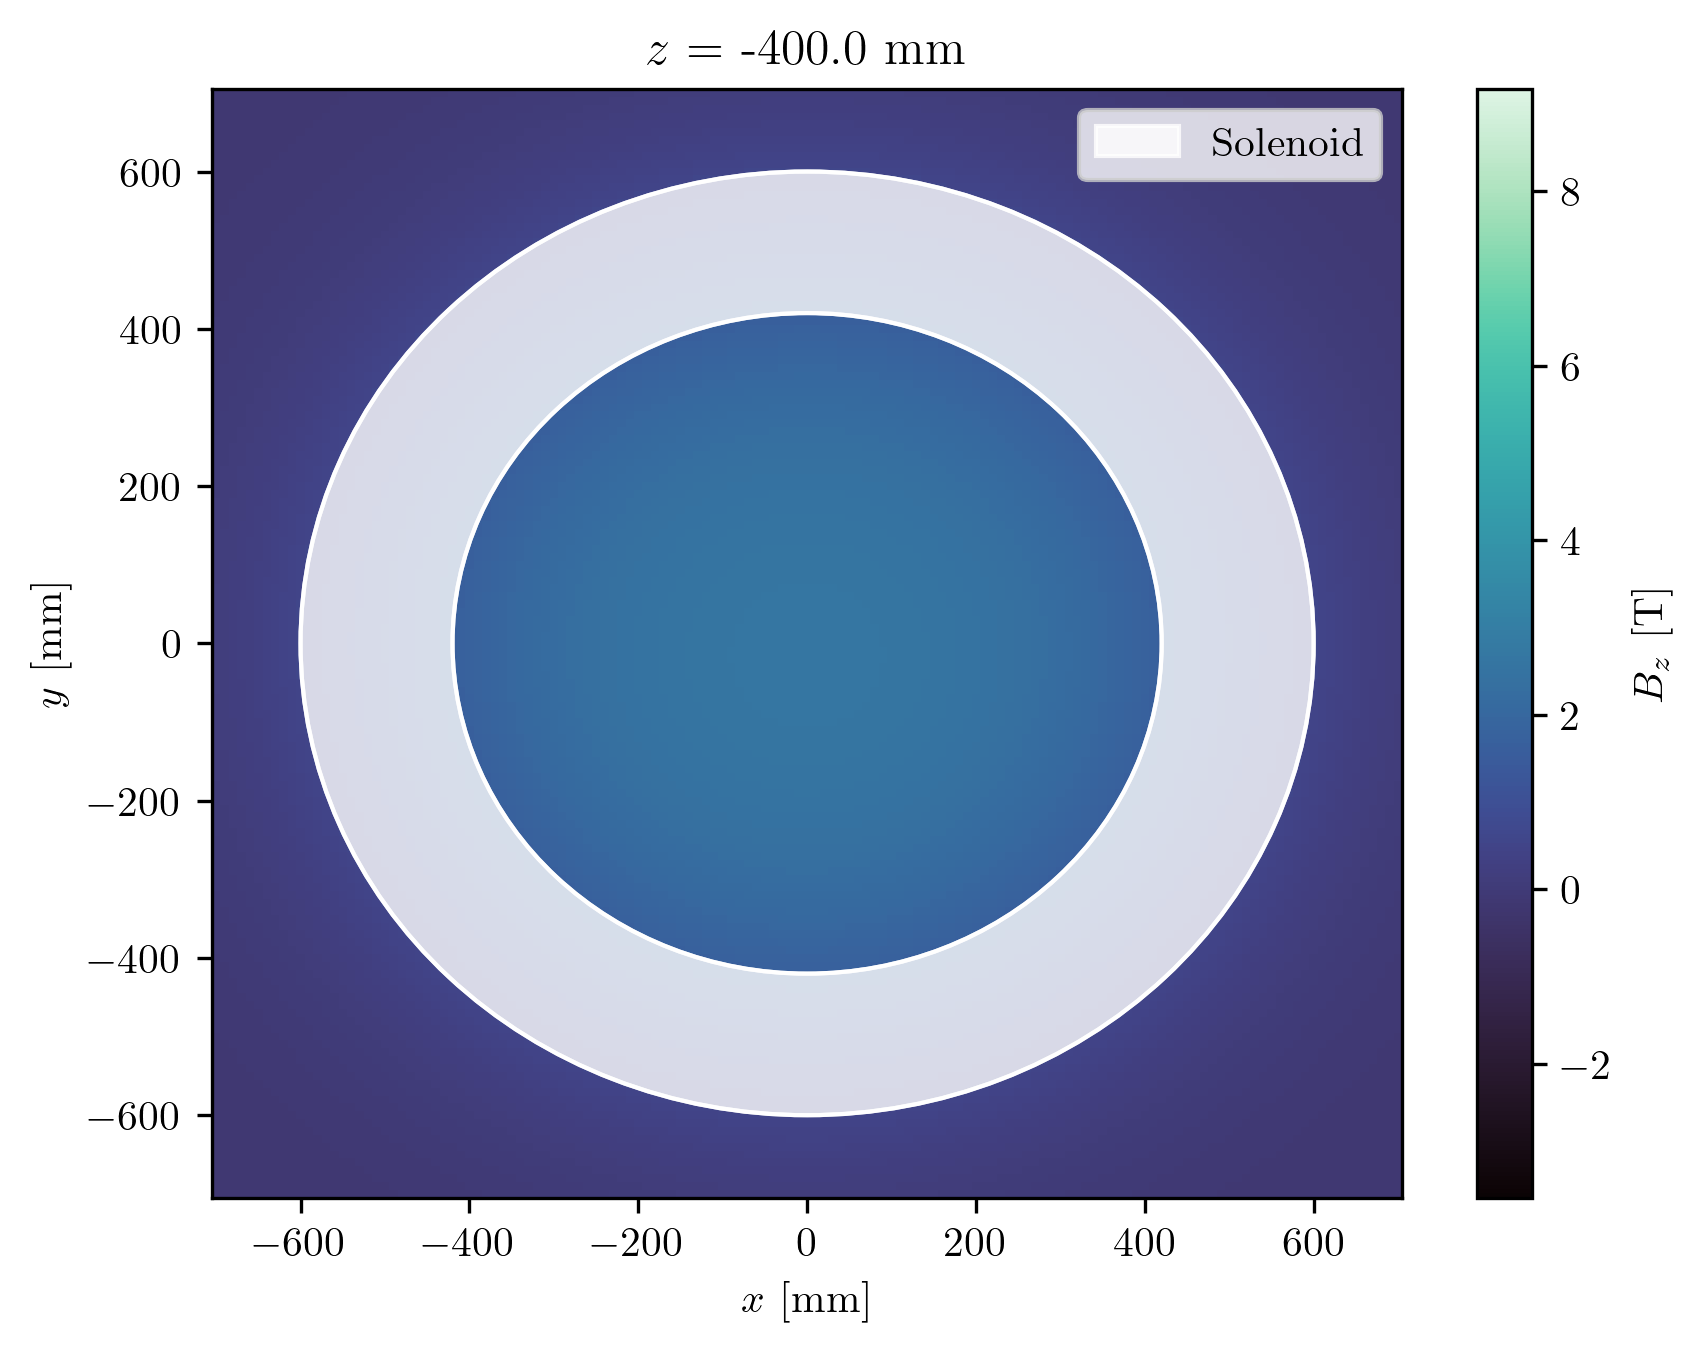

In [21]:
########## B_z ##########

Bz_init = init_data.pivot_table(index='y', columns='x', values='Bz').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_init, cmap=cmap, shading='auto', vmin=data_pitch['Bz'].min(), vmax=data_pitch['Bz'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_pitch[data_pitch['z'] == unique_z[frame]]
    Bz_grid = data_slice.pivot_table(index='y', columns='x', values='Bz').values
    pcm.set_array(Bz_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Bz_g4bl_pitch.gif', writer='pillow')

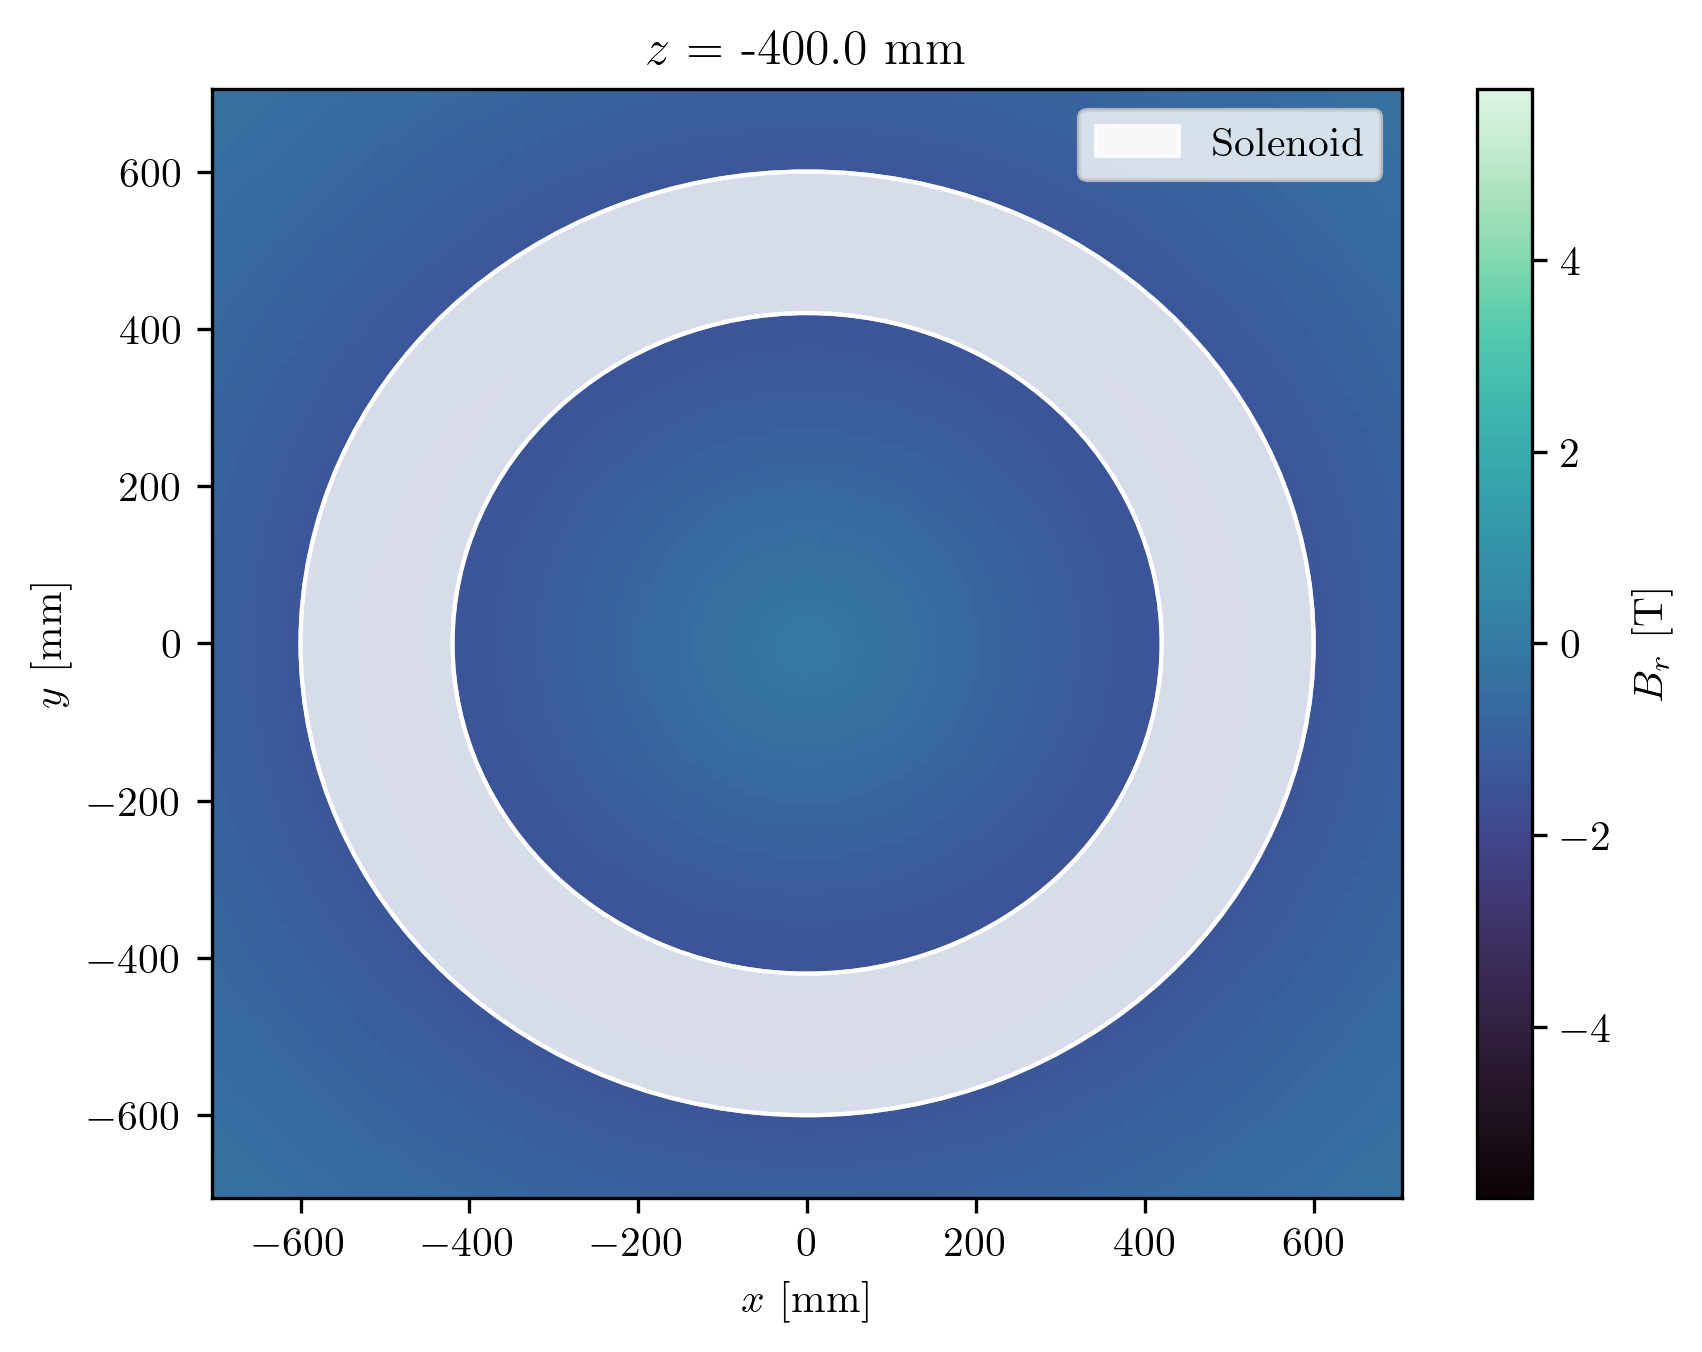

In [22]:
########## B_r ##########

Br_init = init_data.pivot_table(index='y', columns='x', values='Br').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap, shading='auto', vmin=data_pitch['Br'].min(), vmax=data_pitch['Br'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_pitch[data_pitch['z'] == unique_z[frame]]
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values
    pcm.set_array(Br_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_g4bl_pitch.gif', writer='pillow')

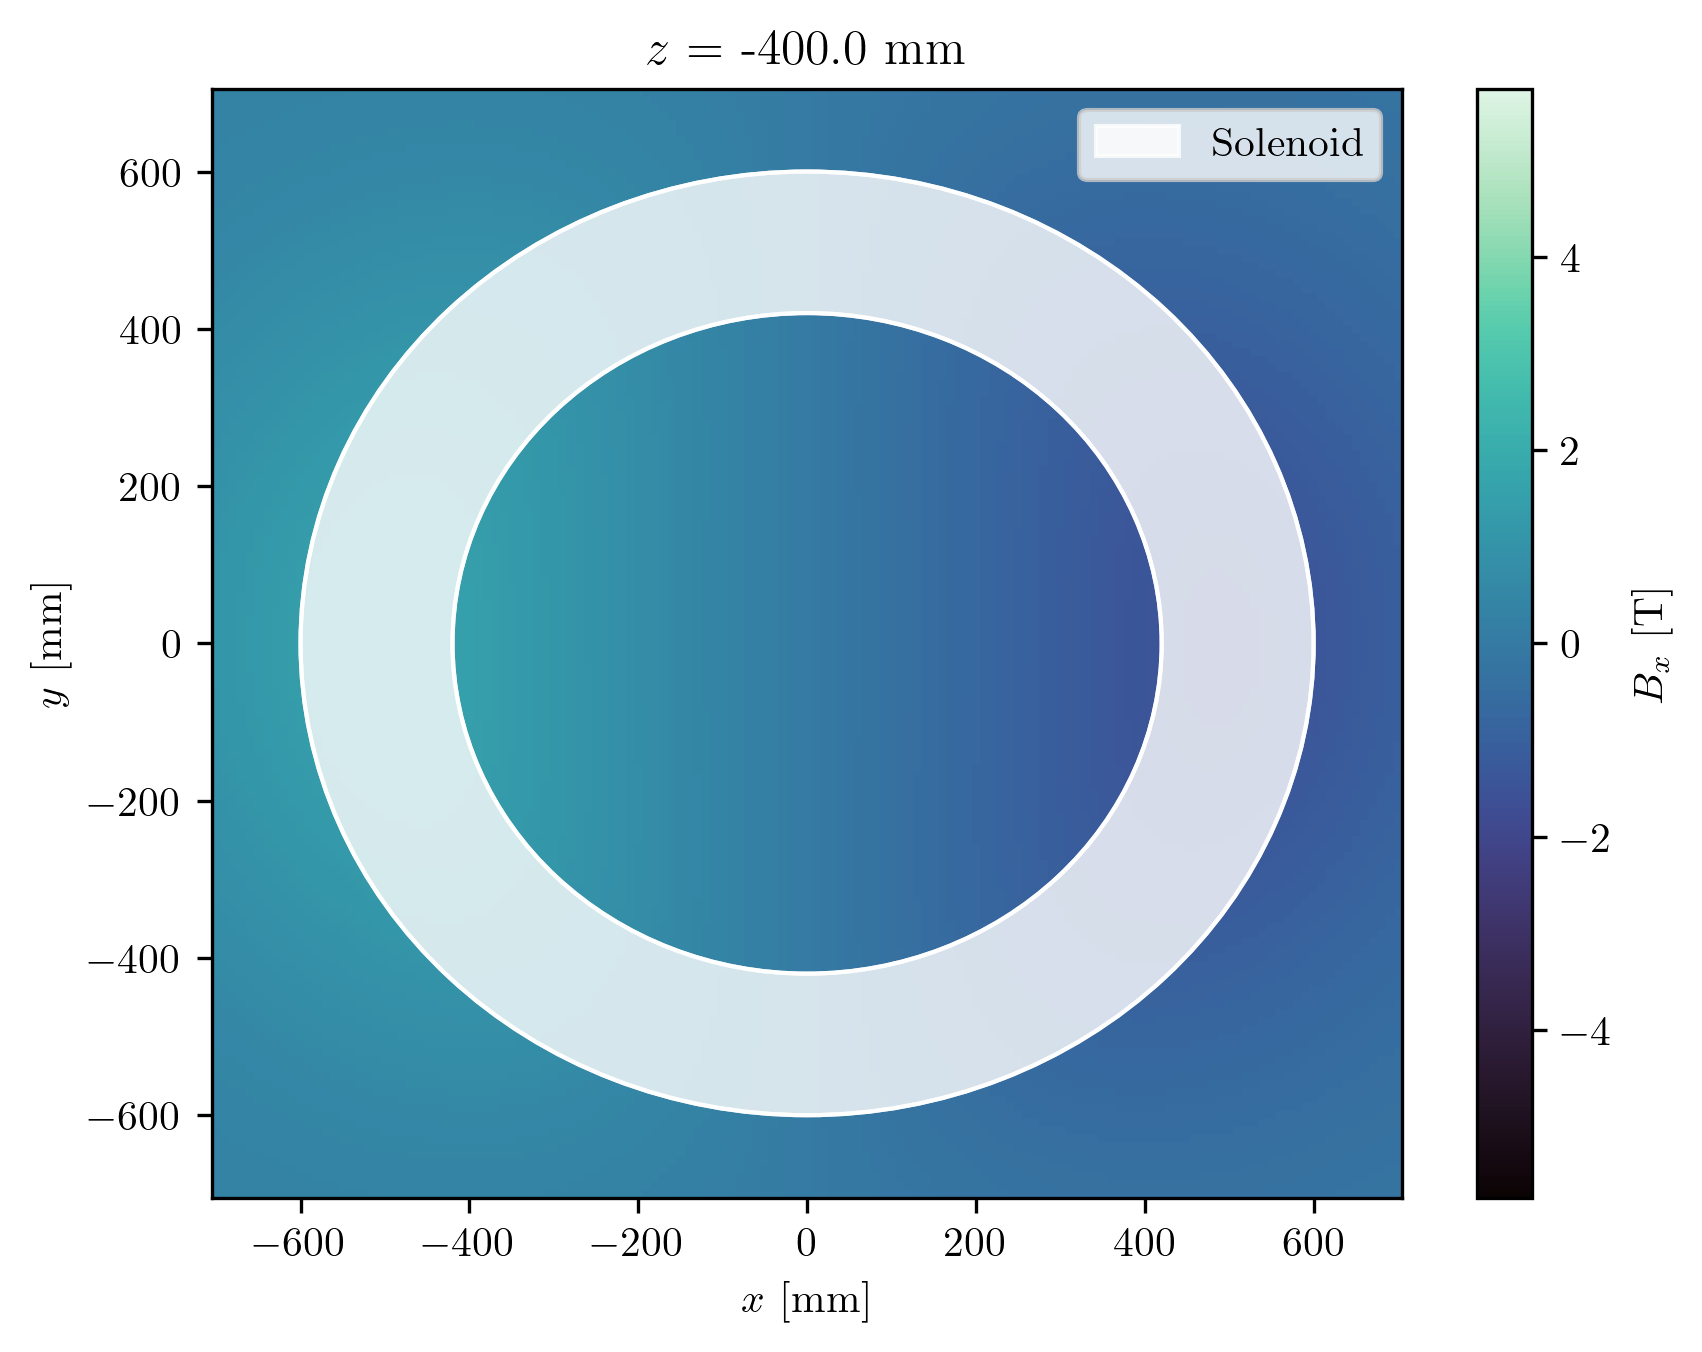

In [23]:
########## B_x ##########

Bx_init = init_data.pivot_table(index='y', columns='x', values='Bx').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_init, cmap=cmap, shading='auto', vmin=data_pitch['Bx'].min(), vmax=data_pitch['Bx'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_x$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_pitch[data_pitch['z'] == unique_z[frame]]
    Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
    pcm.set_array(Bx_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Bx_g4bl_pitch.gif', writer='pillow')

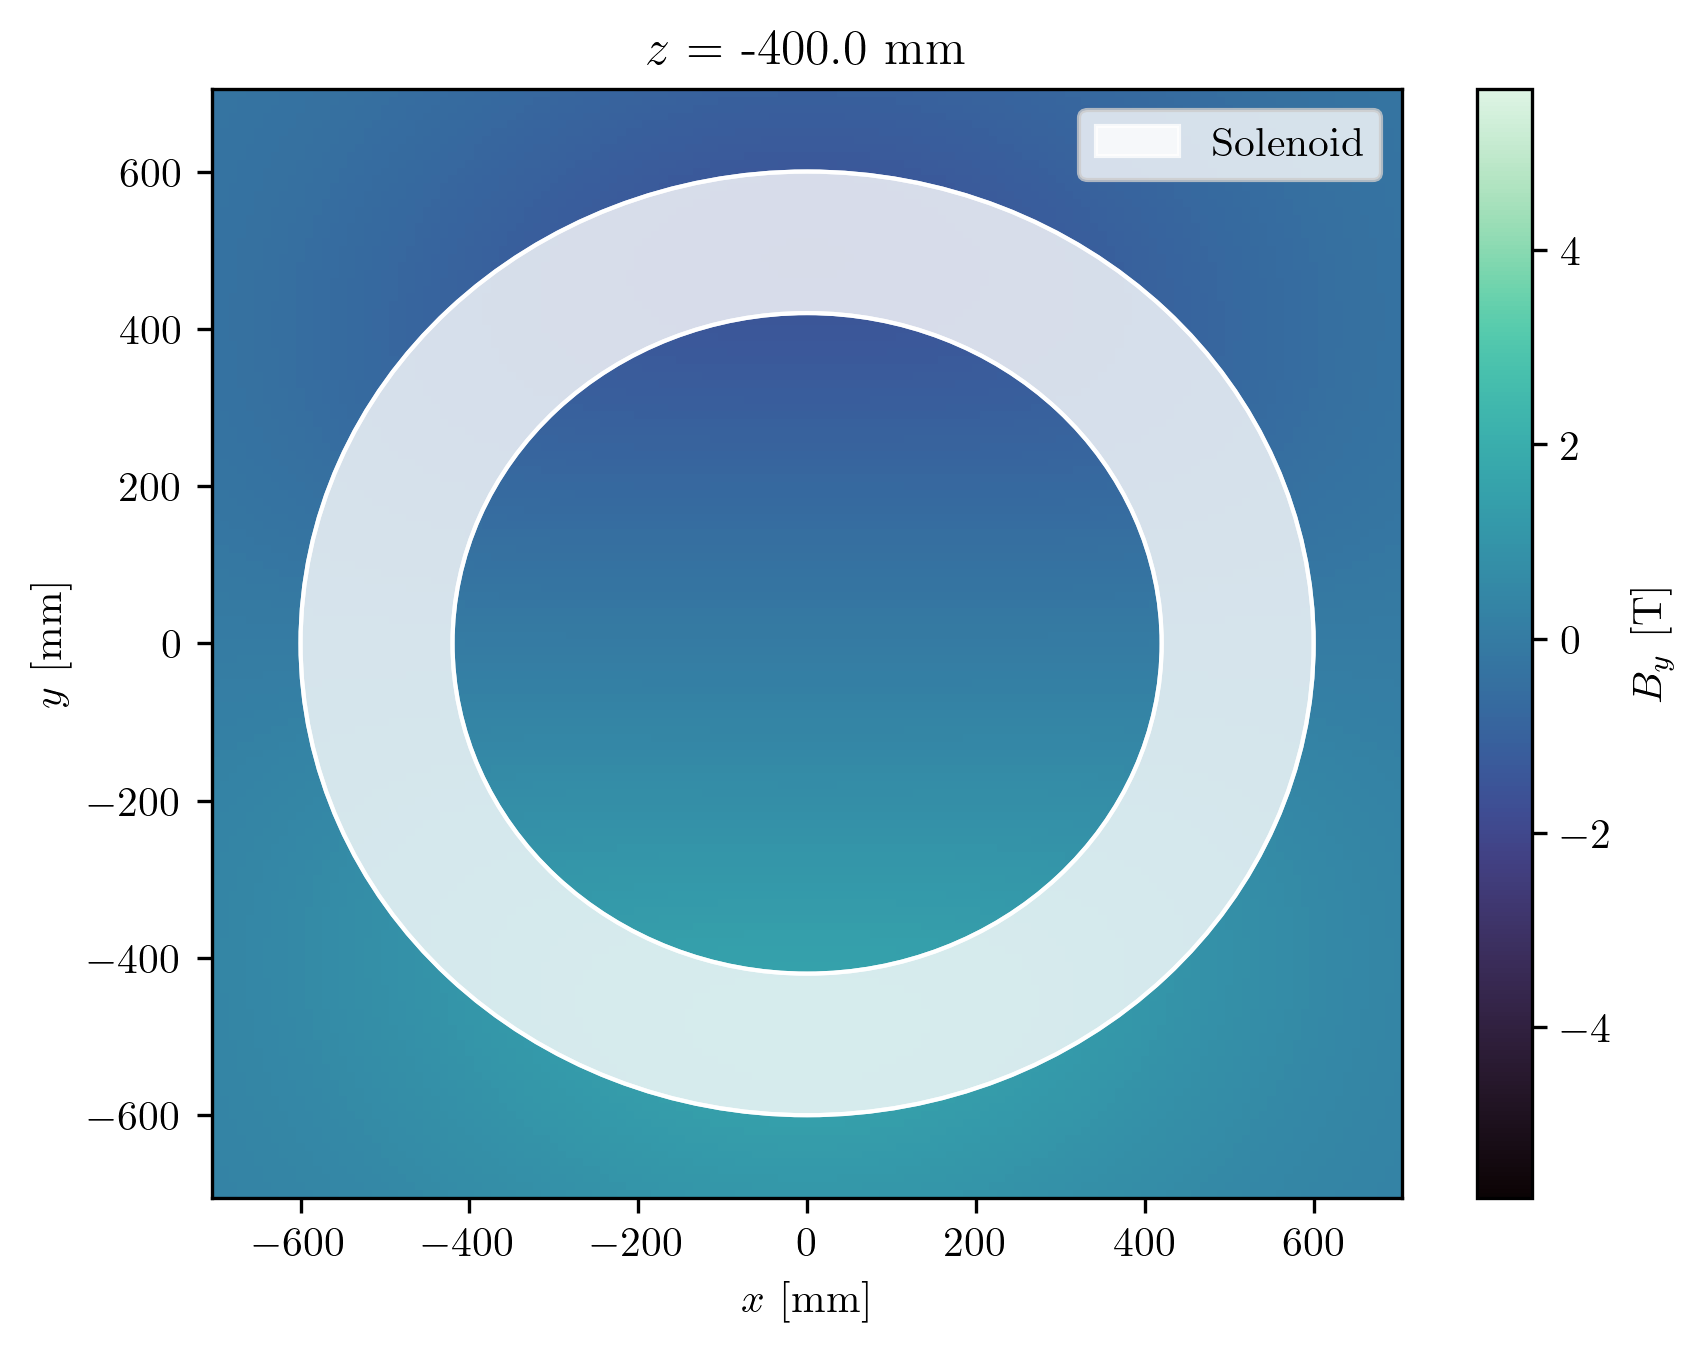

In [24]:
########## B_y ##########

By_init = init_data.pivot_table(index='y', columns='x', values='By').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_init, cmap=cmap, shading='auto', vmin=data_pitch['By'].min(), vmax=data_pitch['By'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_y$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_pitch[data_pitch['z'] == unique_z[frame]]
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    pcm.set_array(By_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'By_g4bl_pitch.gif', writer='pillow')

### Same plots -- now with visual of position w.r.t. solenoid

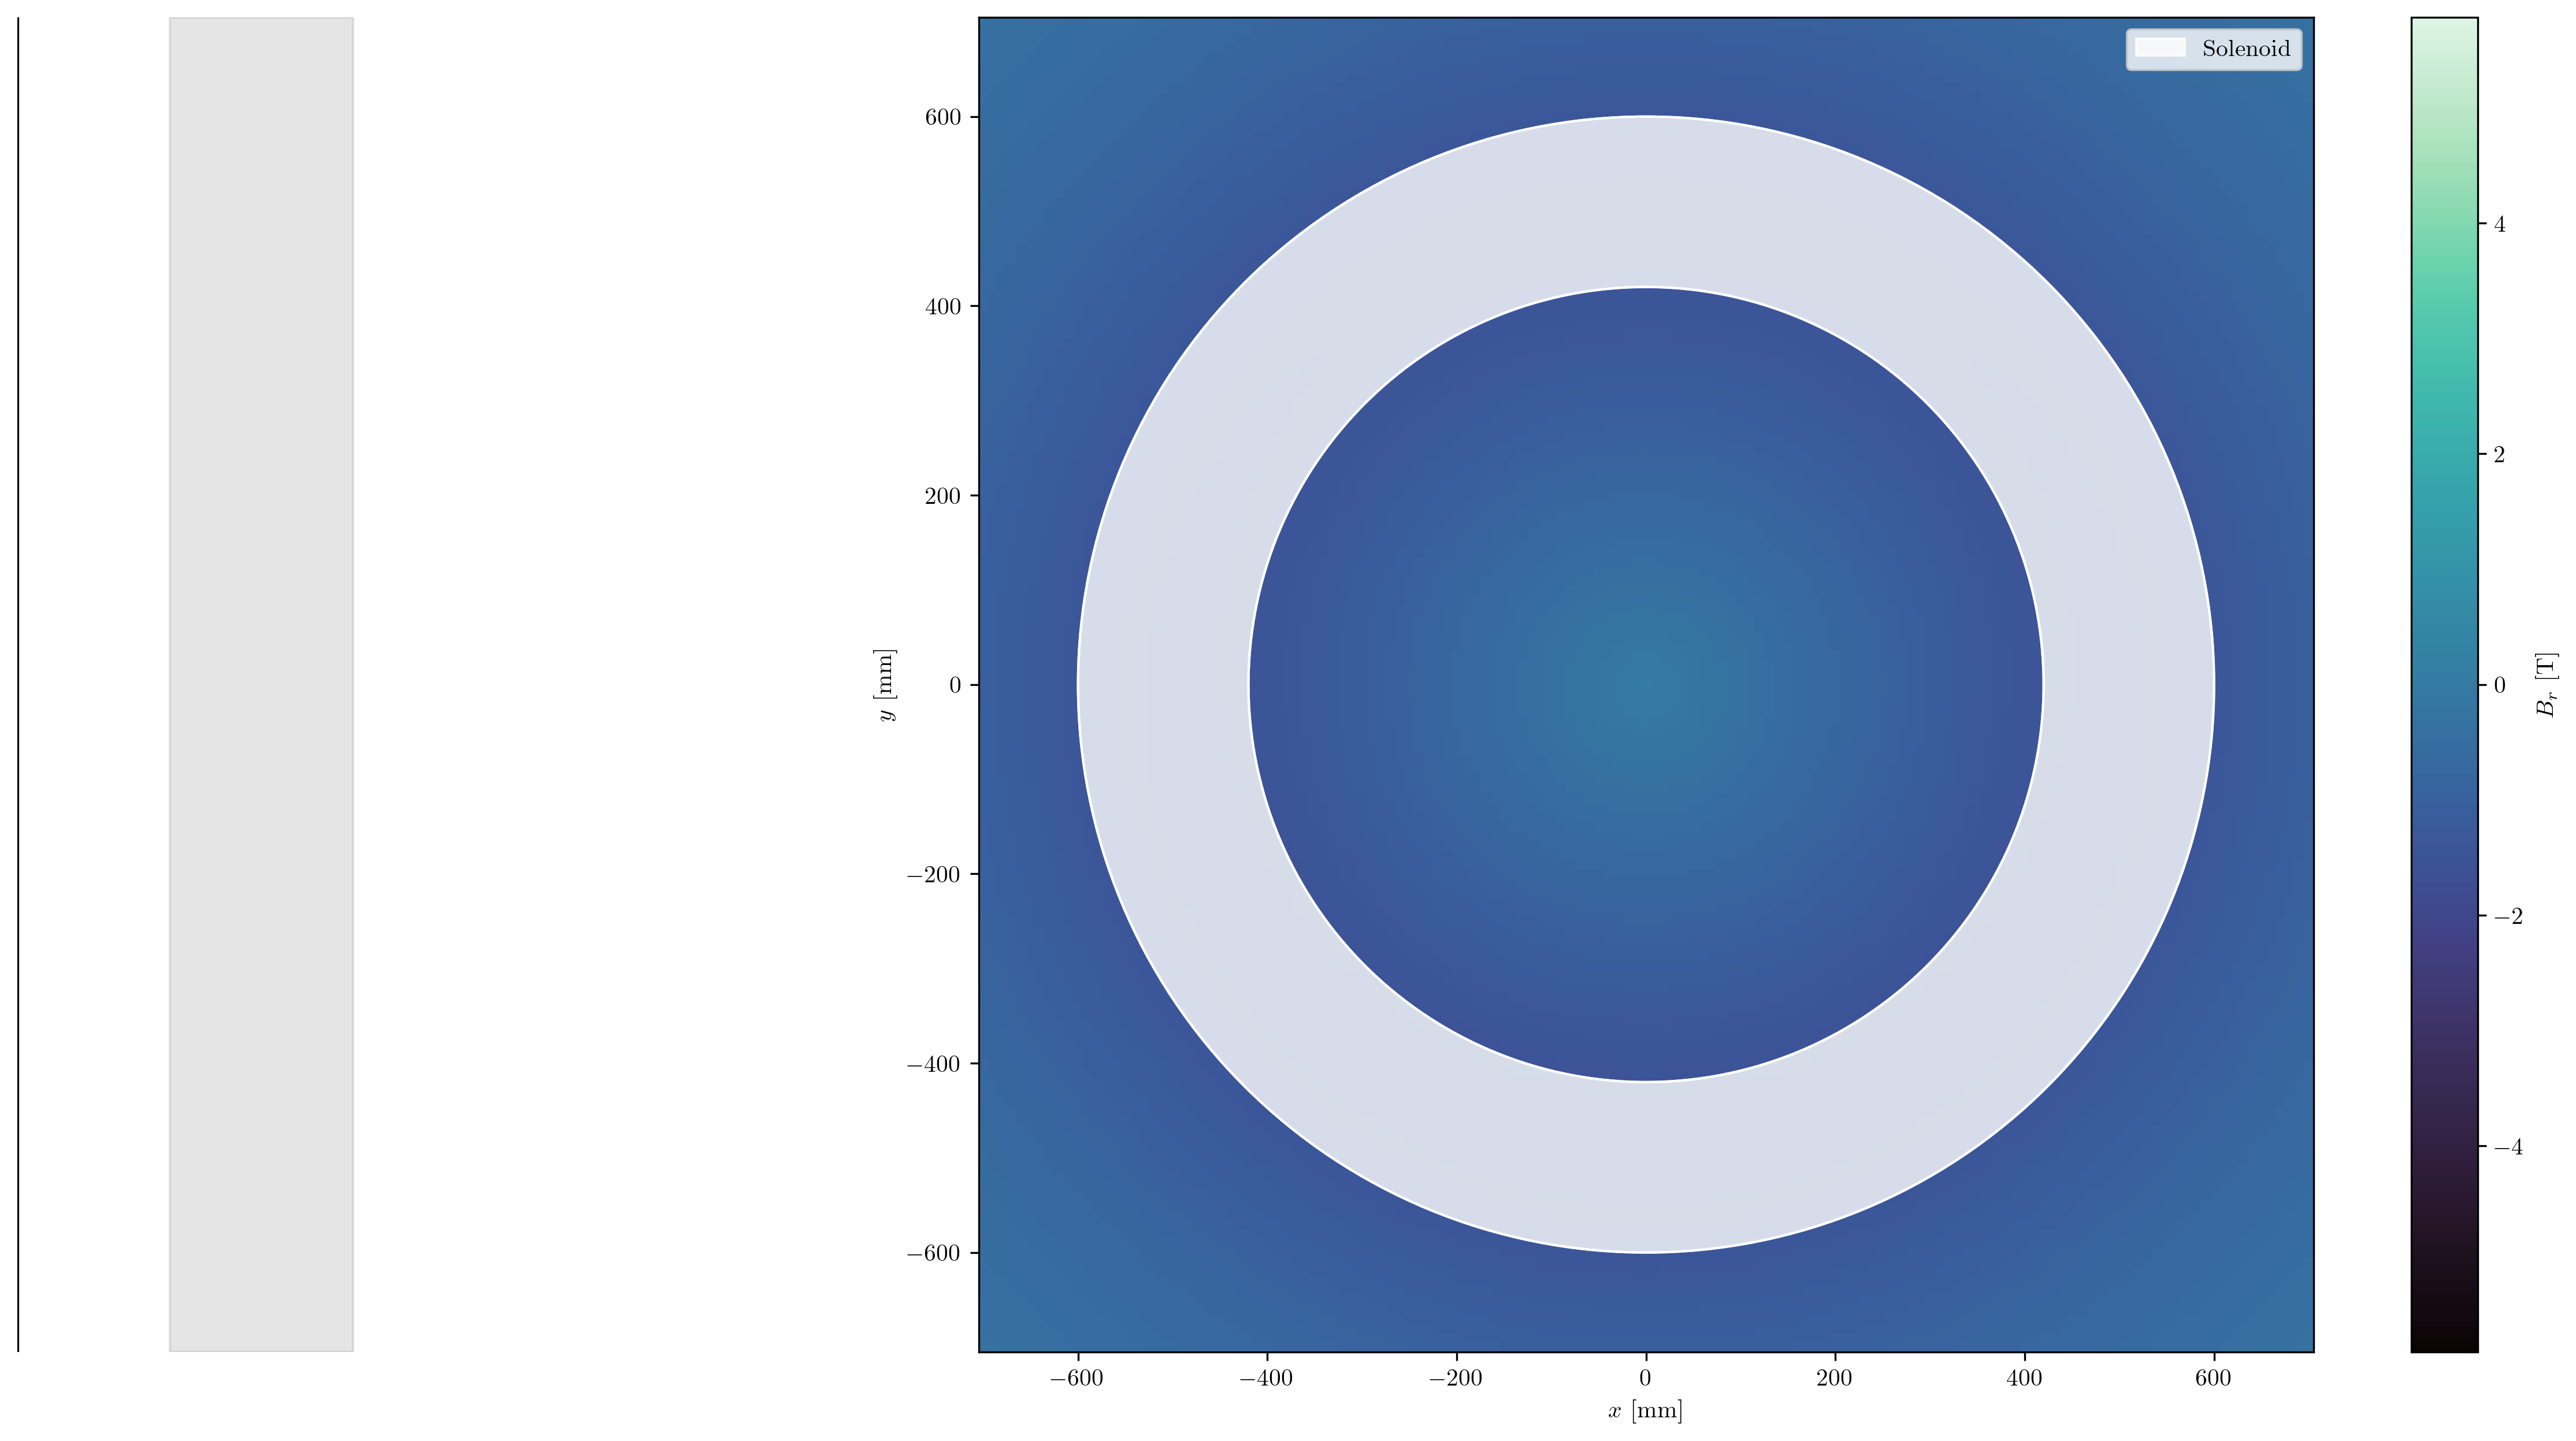

In [25]:
########## B_r ##########

fig, axs = plt.subplots(1, 2, figsize=(20,10), width_ratios=[1,4])
ax, ax2 = axs[1], axs[0]

arrayy = [0, 0]
ax2.set_xlim(-400, 400)
ax2.axvspan(xmin=-150, xmax=150, color='gray', alpha=0.2)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_frame_on(False)
vline = ax2.axvline(x=unique_z[0], color='black')

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap, shading='auto', vmin=data_pitch['Br'].min(), vmax=data_pitch['Br'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')
plot_solenoid(ax)
ax.set_aspect('equal')

def animate(frame):

    z_val = unique_z[frame]

    vline.set_xdata([z_val])

    data_slice = data_pitch[data_pitch['z'] == unique_z[frame]]
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values
    pcm.set_array(Br_grid.ravel())

    return [pcm, vline]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_g4bl_pitch_subplot.gif', writer='pillow')

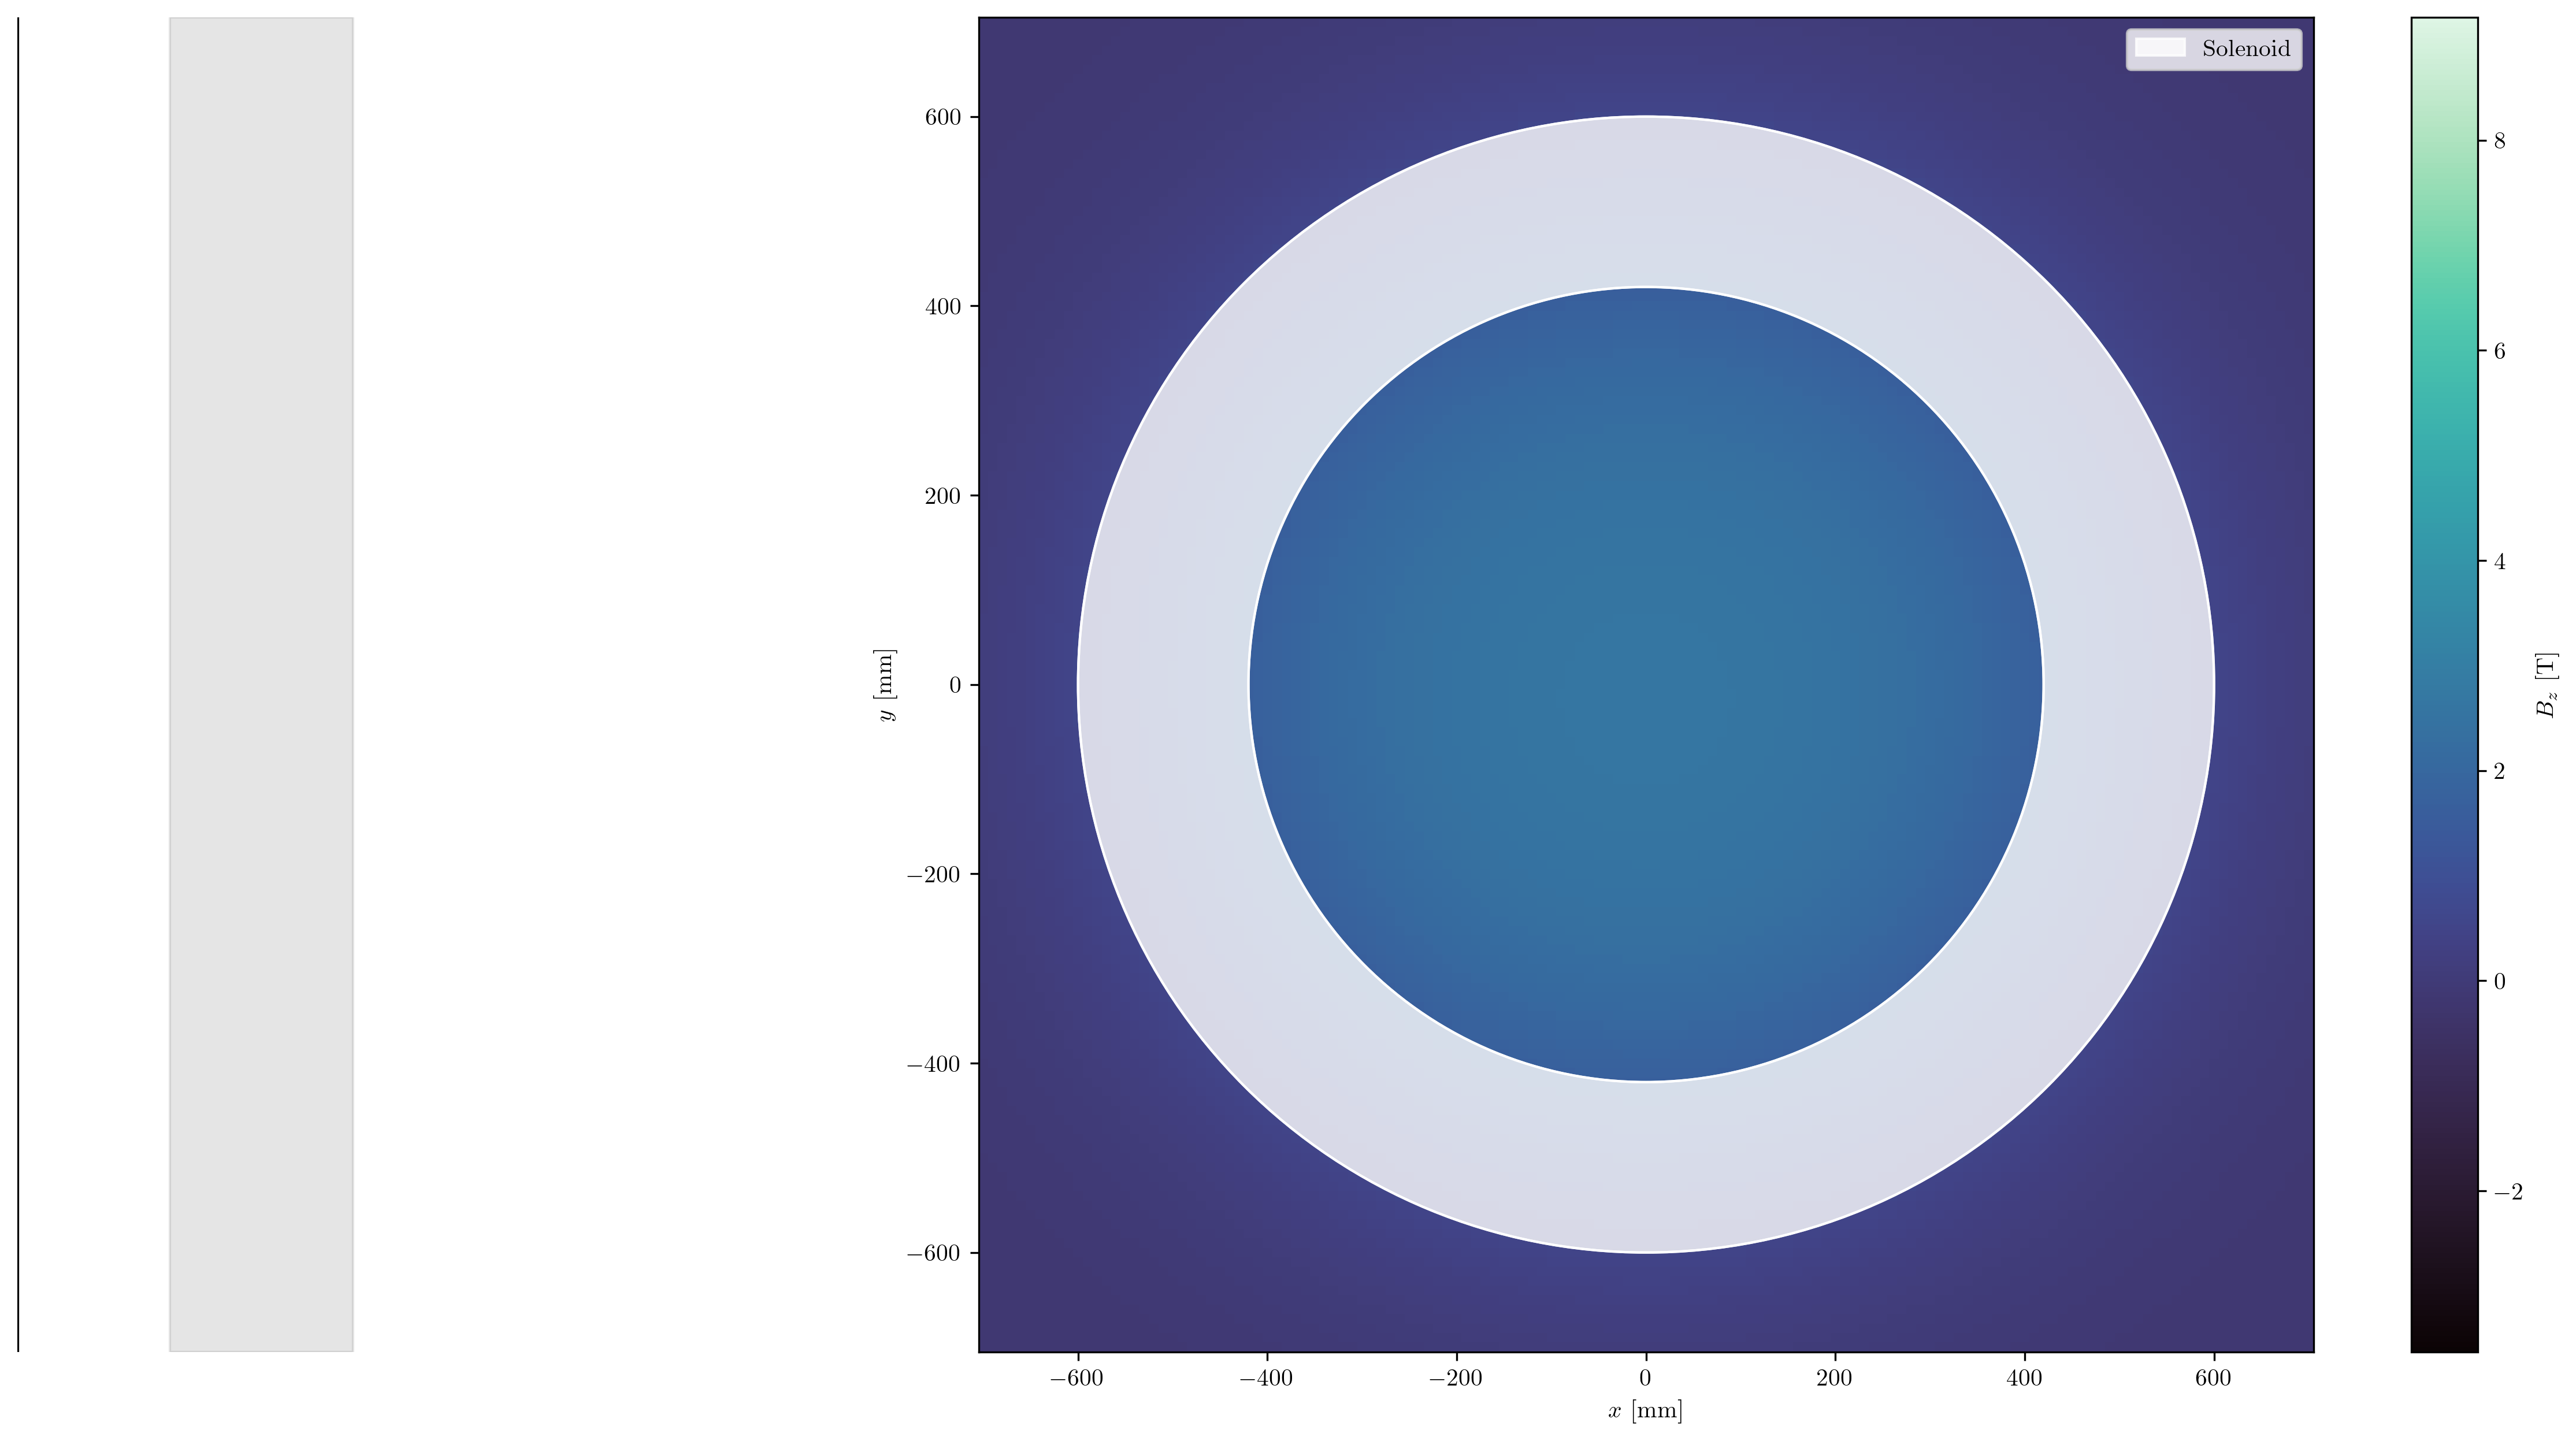

In [26]:
########## B_z ##########

fig, axs = plt.subplots(1, 2, figsize=(20,10), width_ratios=[1,4])
ax, ax2 = axs[1], axs[0]

arrayy = [0, 0]
ax2.set_xlim(-400, 400)
ax2.axvspan(xmin=-150, xmax=150, color='gray', alpha=0.2)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_frame_on(False)
vline = ax2.axvline(x=unique_z[0], color='black')

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_init, cmap=cmap, shading='auto', vmin=data_pitch['Bz'].min(), vmax=data_pitch['Bz'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')
plot_solenoid(ax)
ax.set_aspect('equal')

def animate(frame):

    z_val = unique_z[frame]

    vline.set_xdata([z_val])

    data_slice = data_pitch[data_pitch['z'] == unique_z[frame]]
    Bz_grid = data_slice.pivot_table(index='y', columns='x', values='Bz').values
    pcm.set_array(Bz_grid.ravel())

    return [pcm, vline]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Bz_g4bl_pitch_subplot.gif', writer='pillow')

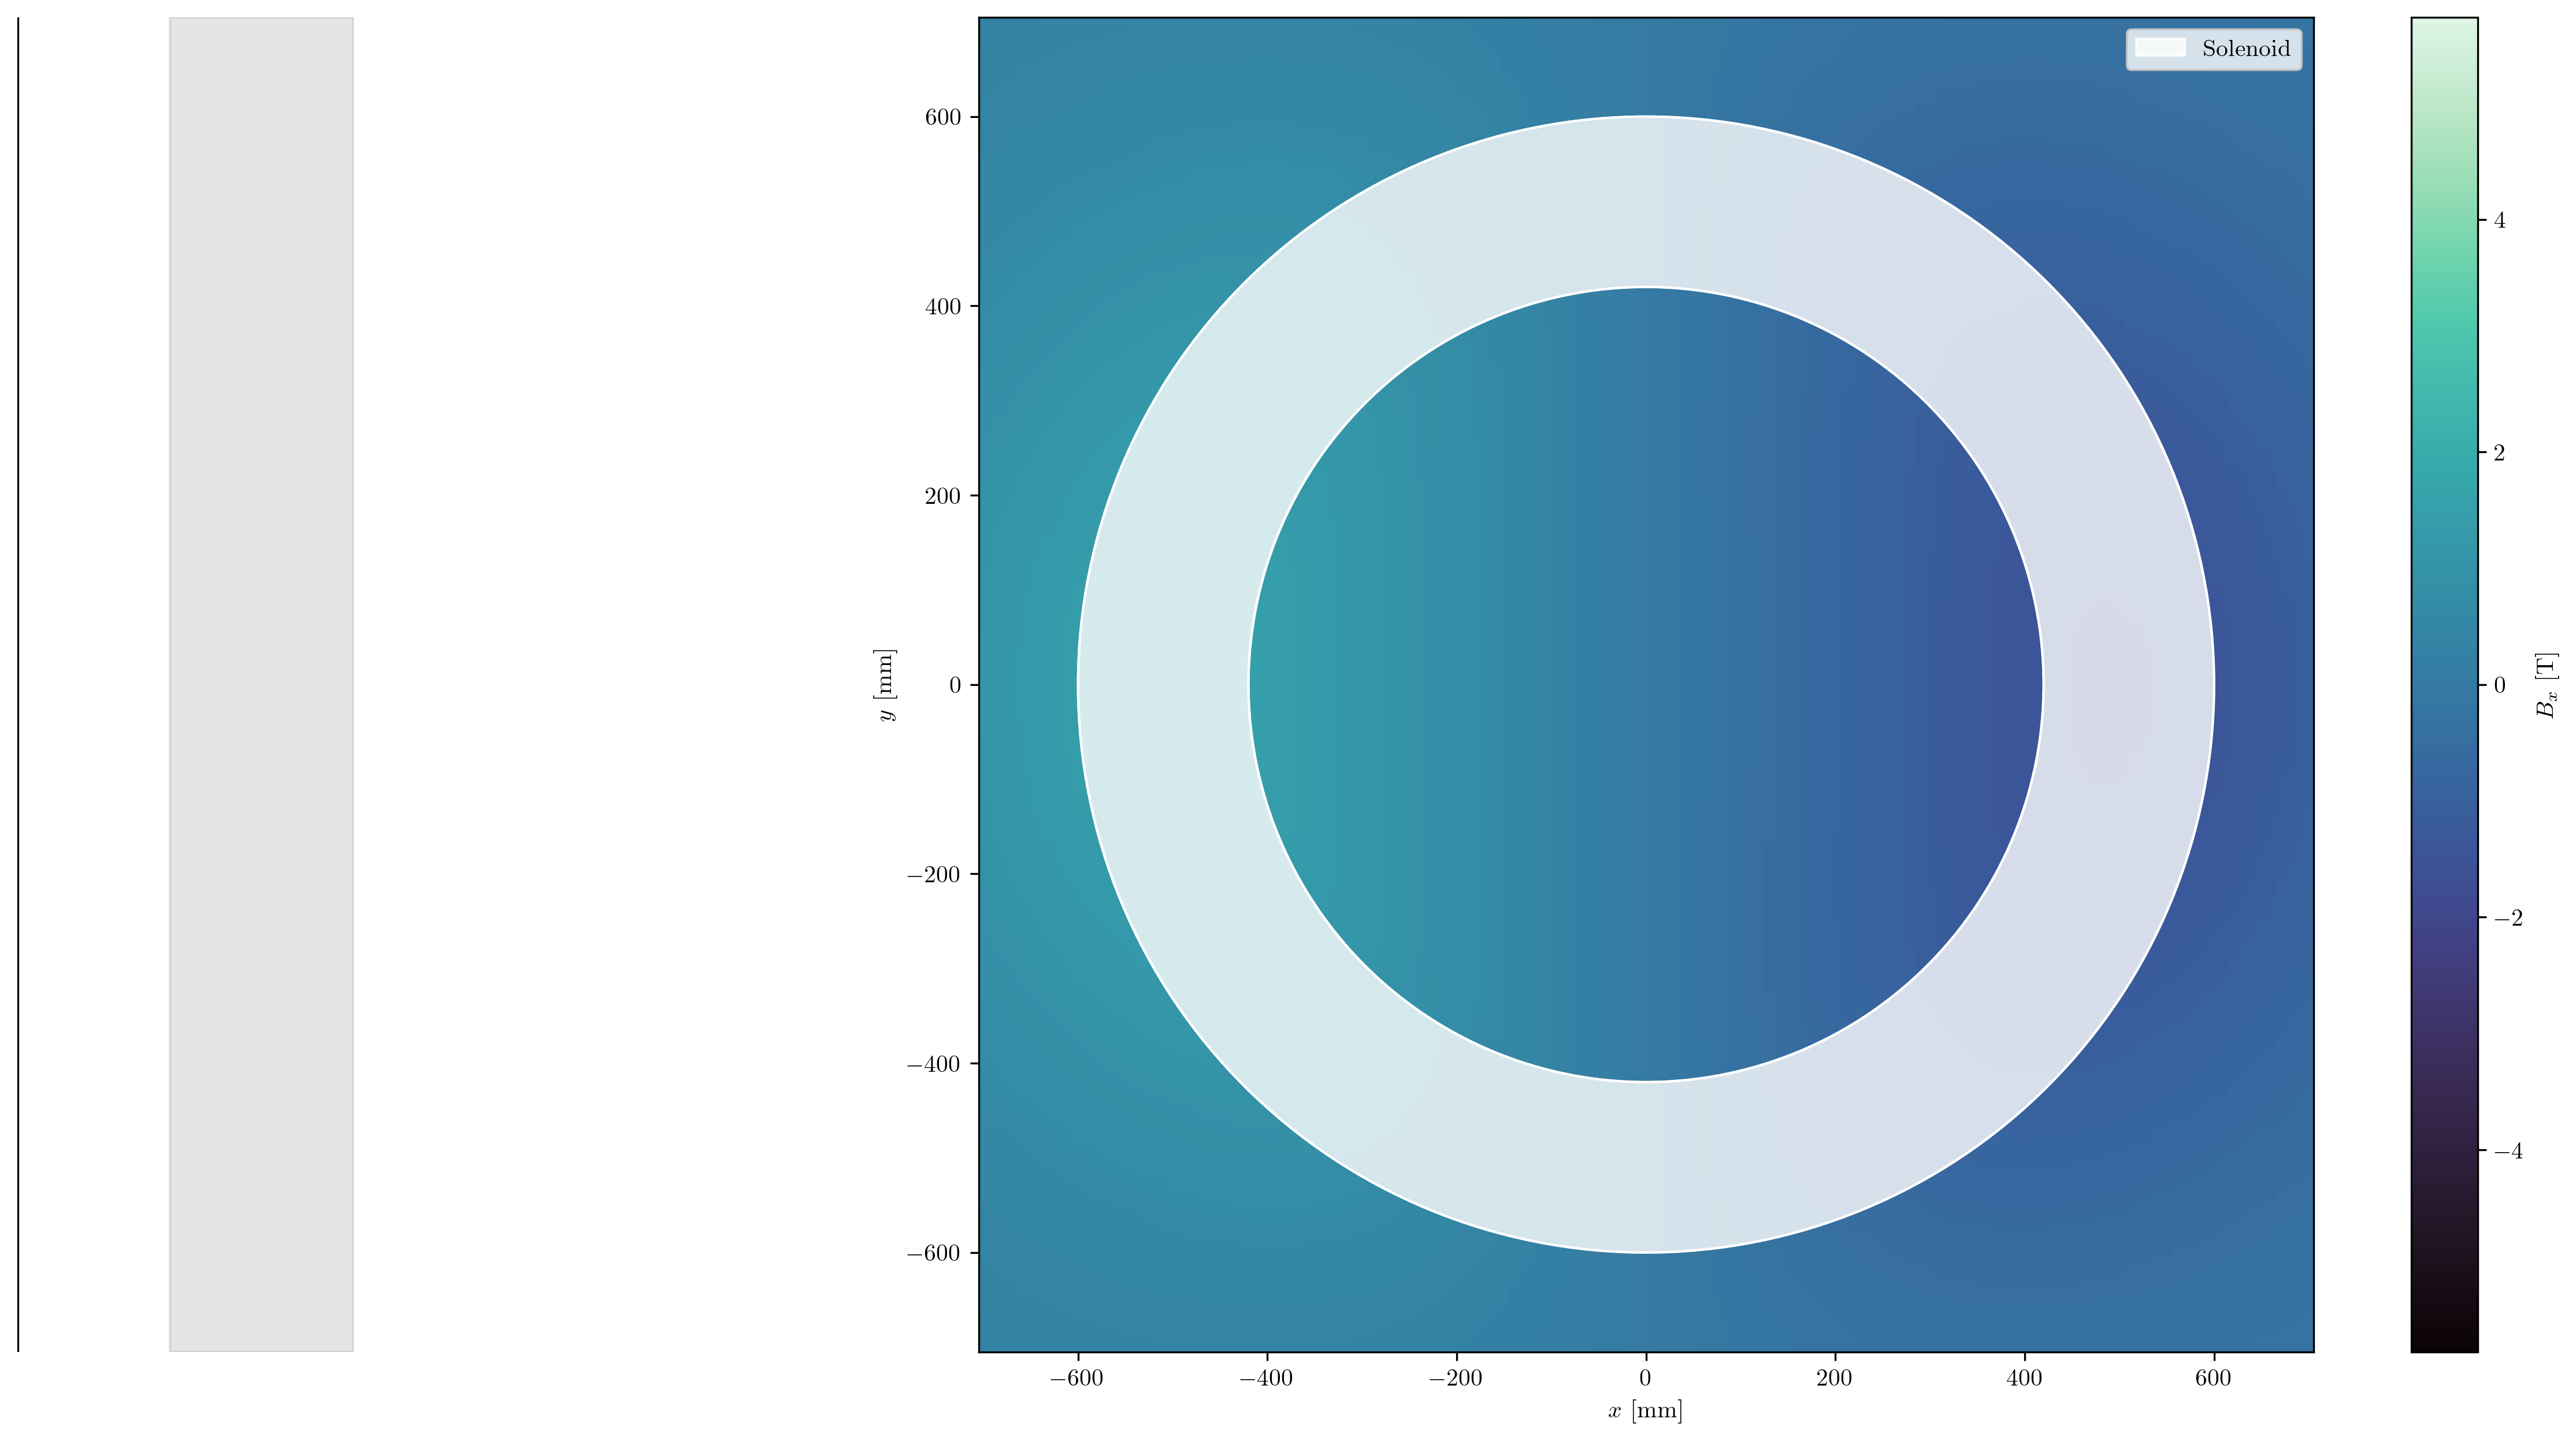

In [27]:
########## B_x ##########

fig, axs = plt.subplots(1, 2, figsize=(20,10), width_ratios=[1,4])
ax, ax2 = axs[1], axs[0]

arrayy = [0, 0]
ax2.set_xlim(-400, 400)
ax2.axvspan(xmin=-150, xmax=150, color='gray', alpha=0.2)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_frame_on(False)
vline = ax2.axvline(x=unique_z[0], color='black')

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_init, cmap=cmap, shading='auto', vmin=data_pitch['Bx'].min(), vmax=data_pitch['Bx'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_x$ [T]')
plot_solenoid(ax)
ax.set_aspect('equal')

def animate(frame):

    z_val = unique_z[frame]

    vline.set_xdata([z_val])

    data_slice = data_pitch[data_pitch['z'] == unique_z[frame]]
    Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
    pcm.set_array(Bx_grid.ravel())

    return [pcm, vline]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Bx_g4bl_pitch_subplot.gif', writer='pillow')

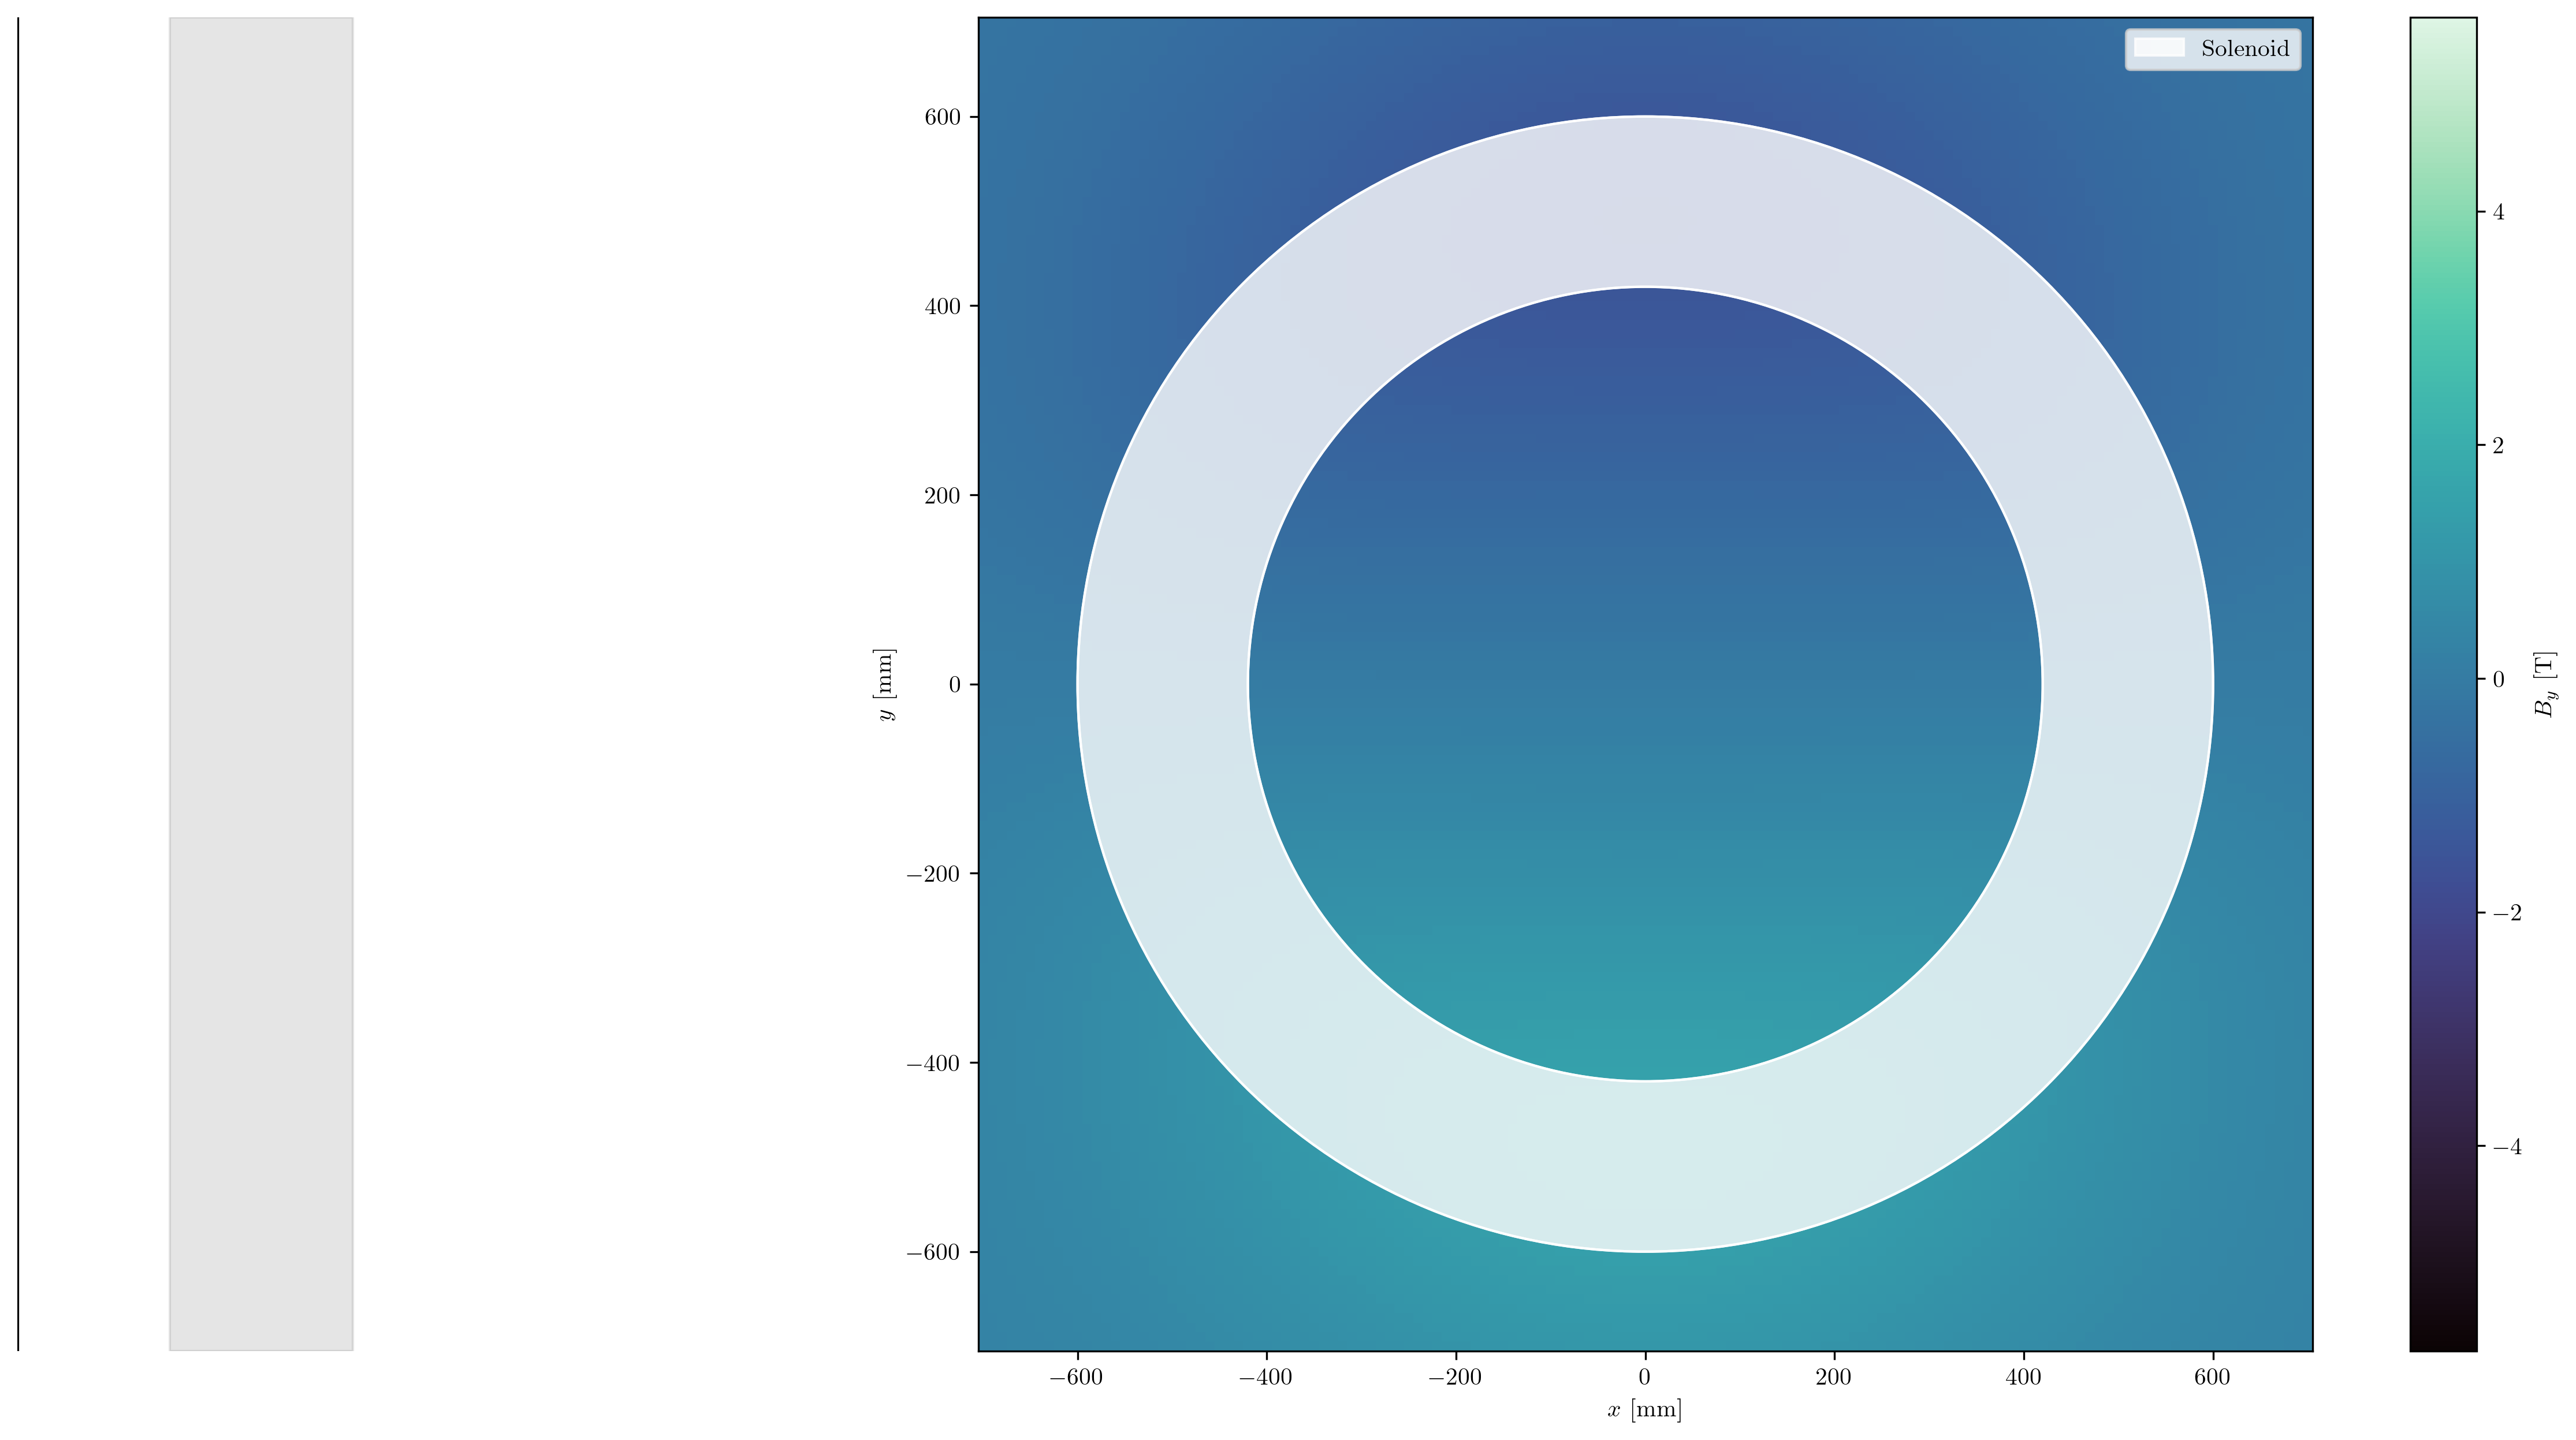

In [28]:
########## B_y ##########

fig, axs = plt.subplots(1, 2, figsize=(20,10), width_ratios=[1,4])
ax, ax2 = axs[1], axs[0]

arrayy = [0, 0]
ax2.set_xlim(-400, 400)
ax2.axvspan(xmin=-150, xmax=150, color='gray', alpha=0.2)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_frame_on(False)
vline = ax2.axvline(x=unique_z[0], color='black')

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_init, cmap=cmap, shading='auto', vmin=data_pitch['By'].min(), vmax=data_pitch['By'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_y$ [T]')
plot_solenoid(ax)
ax.set_aspect('equal')

def animate(frame):

    z_val = unique_z[frame]

    vline.set_xdata([z_val])

    data_slice = data_pitch[data_pitch['z'] == unique_z[frame]]
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    pcm.set_array(By_grid.ravel())

    return [pcm, vline]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'By_g4bl_pitch_subplot.gif', writer='pillow')

### Comparison of pitch and no-pitch cases

In [29]:
data_diff = data_pitch.copy()
data_diff['Br'] -= data_nopitch['Br']
data_diff['Bx'] -= data_nopitch['Bx']
data_diff['By'] -= data_nopitch['By']
data_diff['Bz'] -= data_nopitch['Bz']

In [30]:
unique_z = np.sort(data_diff['z'].unique())
init_data = data_diff[data_diff['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

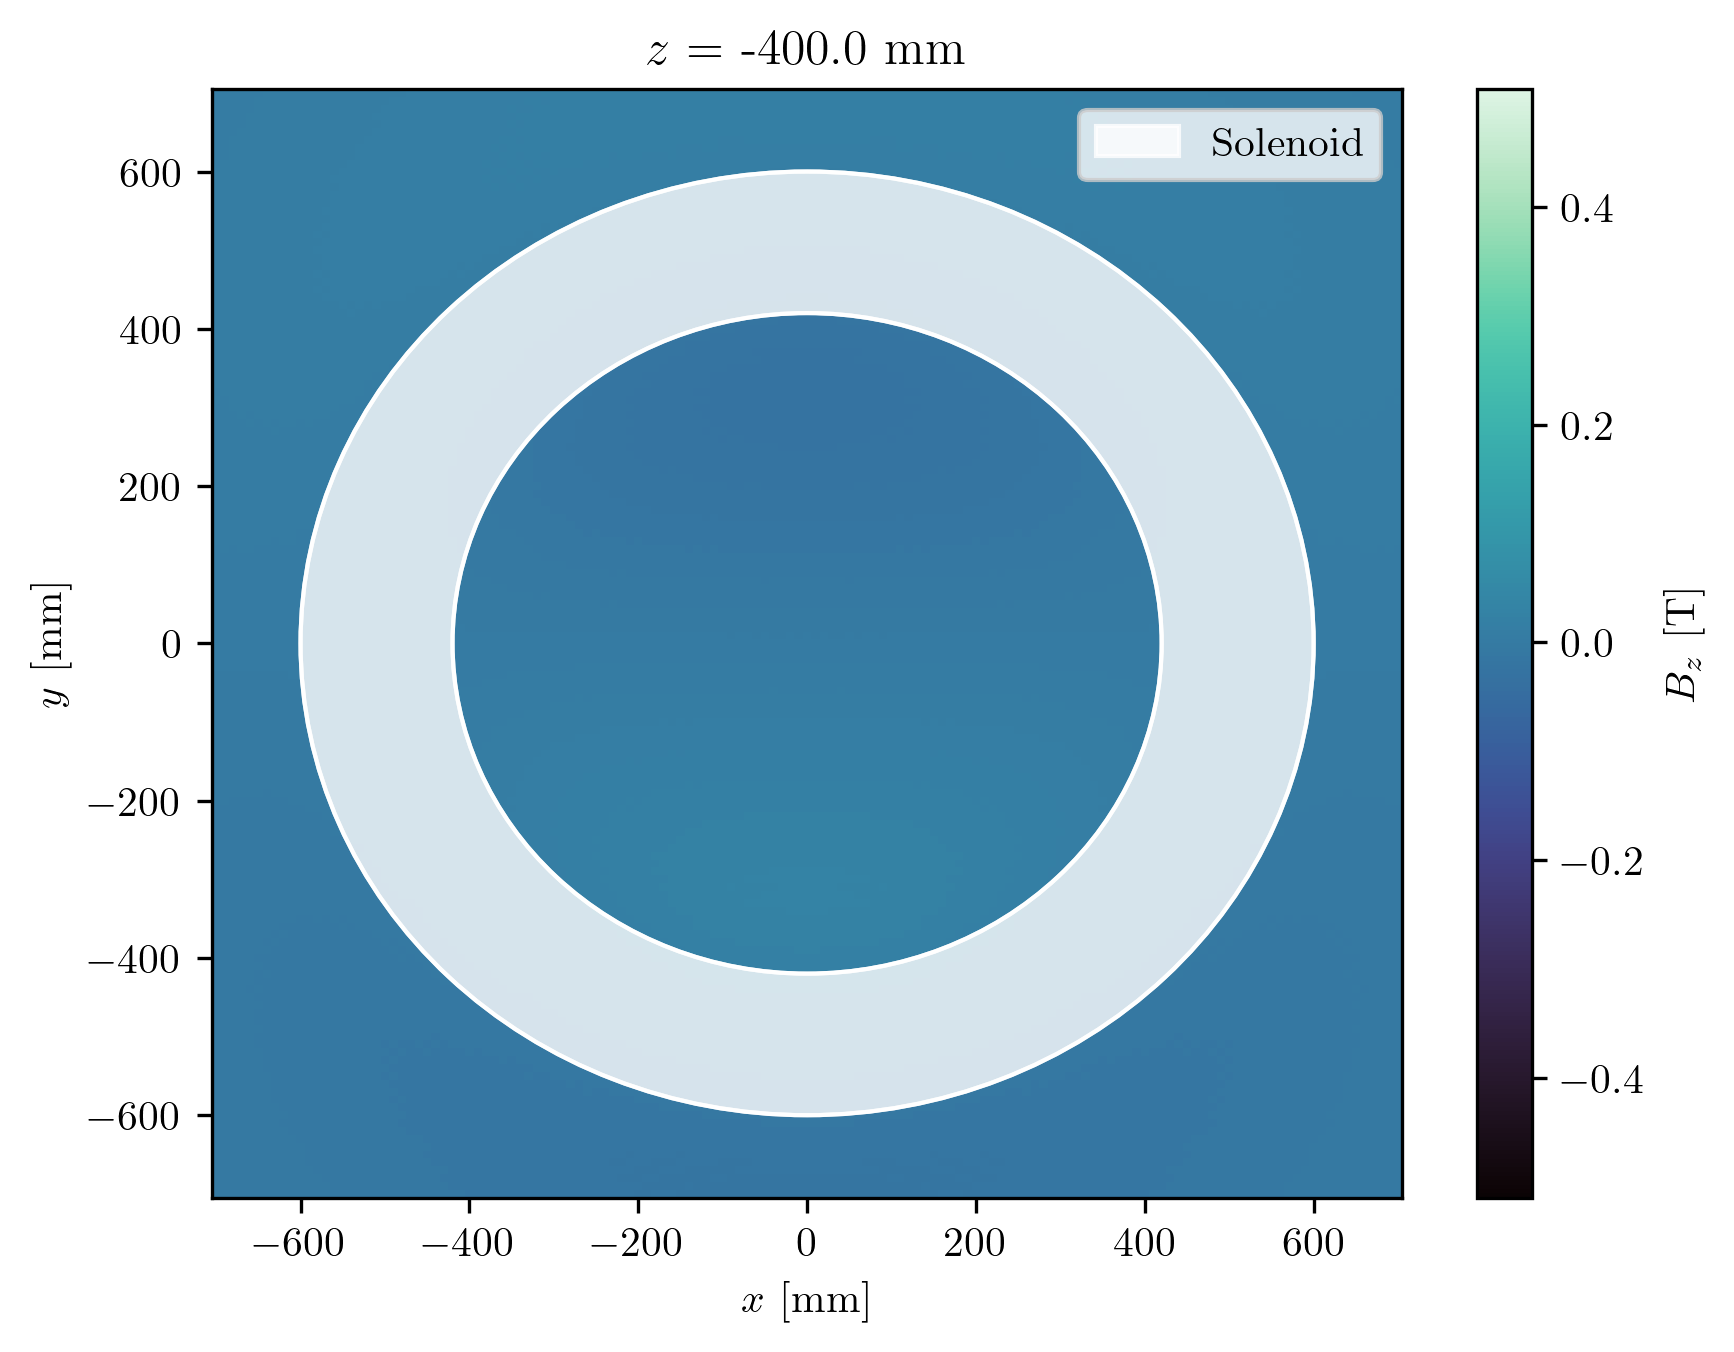

In [31]:
########## B_z ##########

Bz_init = init_data.pivot_table(index='y', columns='x', values='Bz').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_init, cmap=cmap, shading='auto', vmin=data_diff['Bz'].min(), vmax=data_diff['Bz'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_diff[data_diff['z'] == unique_z[frame]]
    Bz_grid = data_slice.pivot_table(index='y', columns='x', values='Bz').values
    pcm.set_array(Bz_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Bz_g4bl_pitch.gif', writer='pillow')

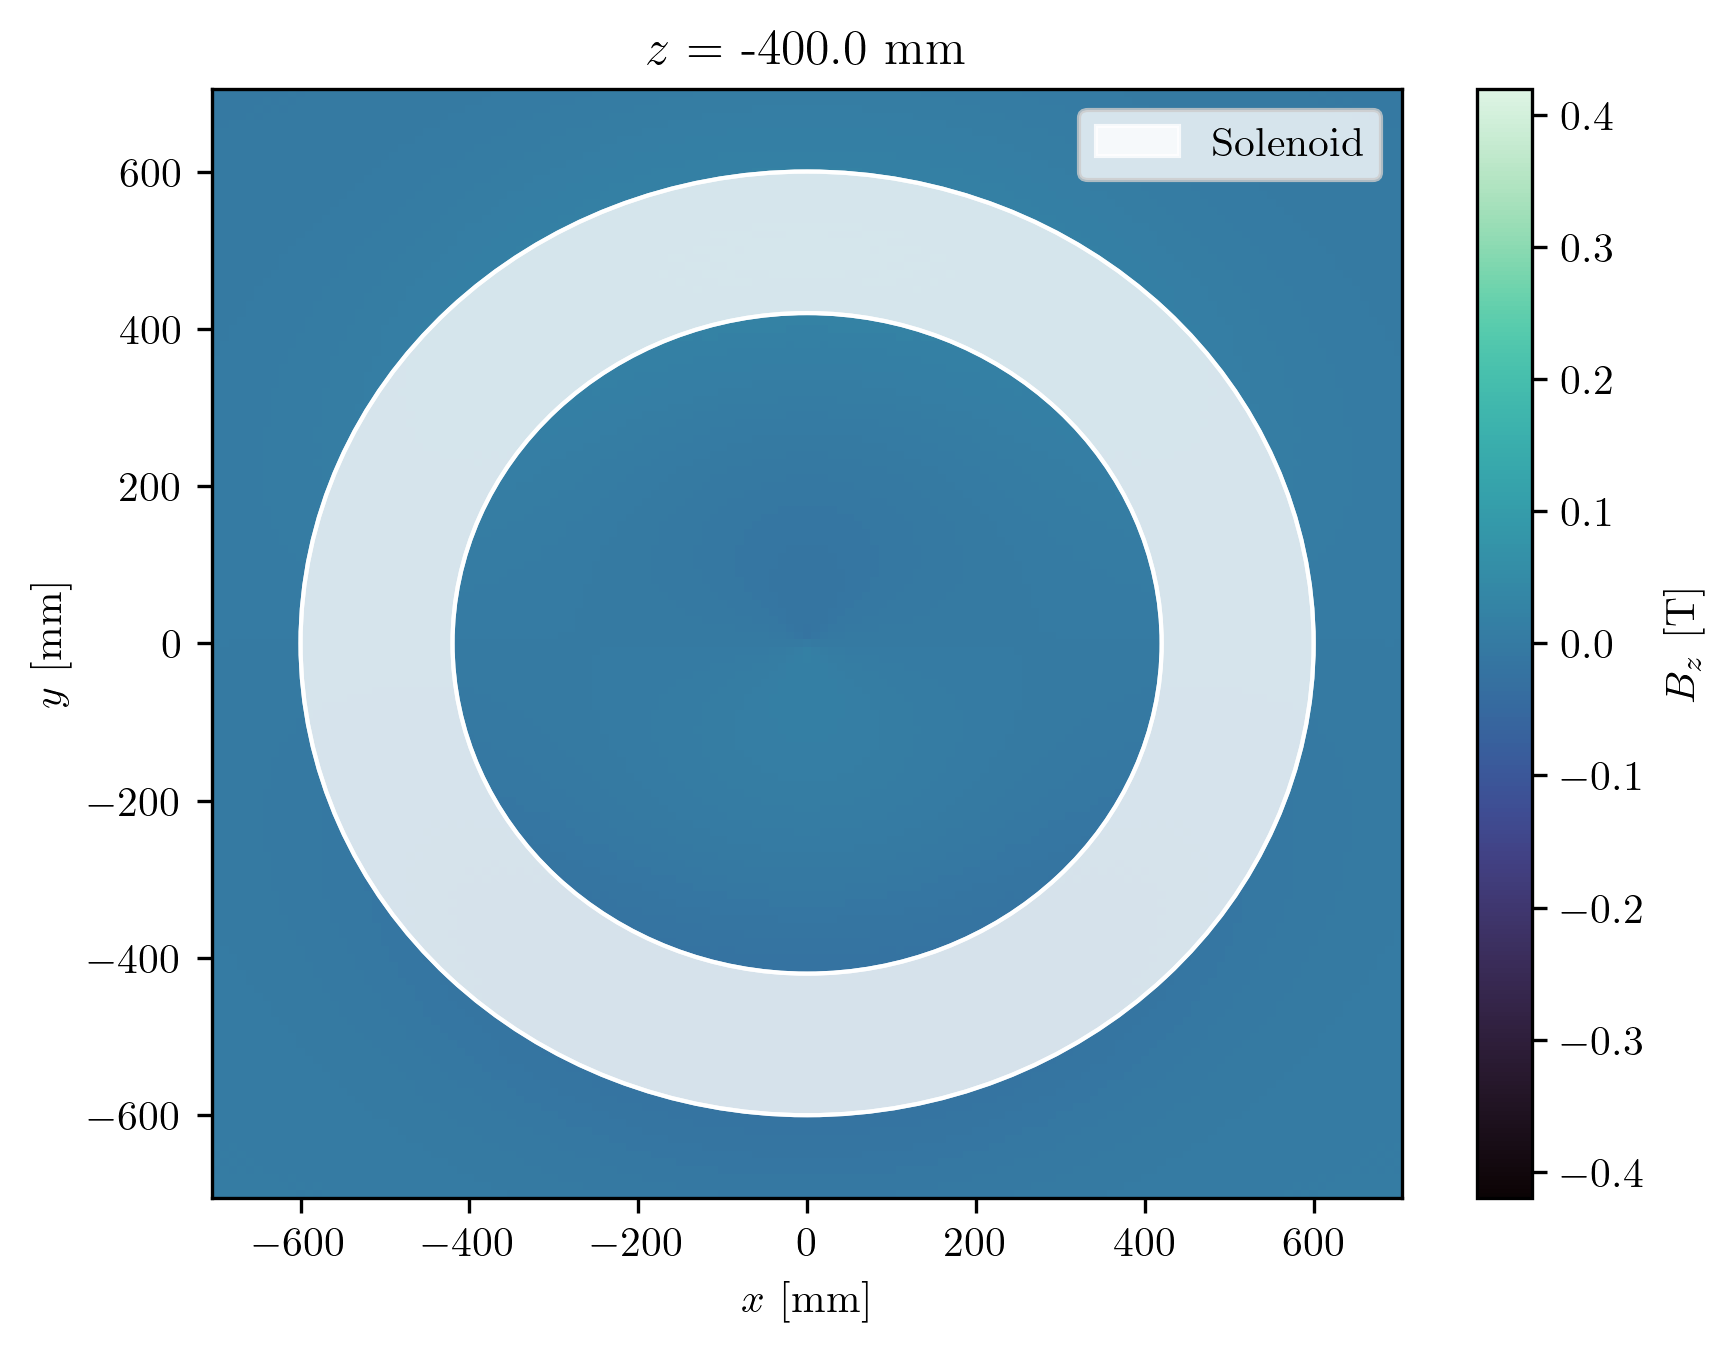

In [32]:
########## B_r ##########

Br_init = init_data.pivot_table(index='y', columns='x', values='Br').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap, shading='auto', vmin=data_diff['Br'].min(), vmax=data_diff['Br'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_diff[data_diff['z'] == unique_z[frame]]
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values
    pcm.set_array(Br_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Br_g4bl_pitch.gif', writer='pillow')

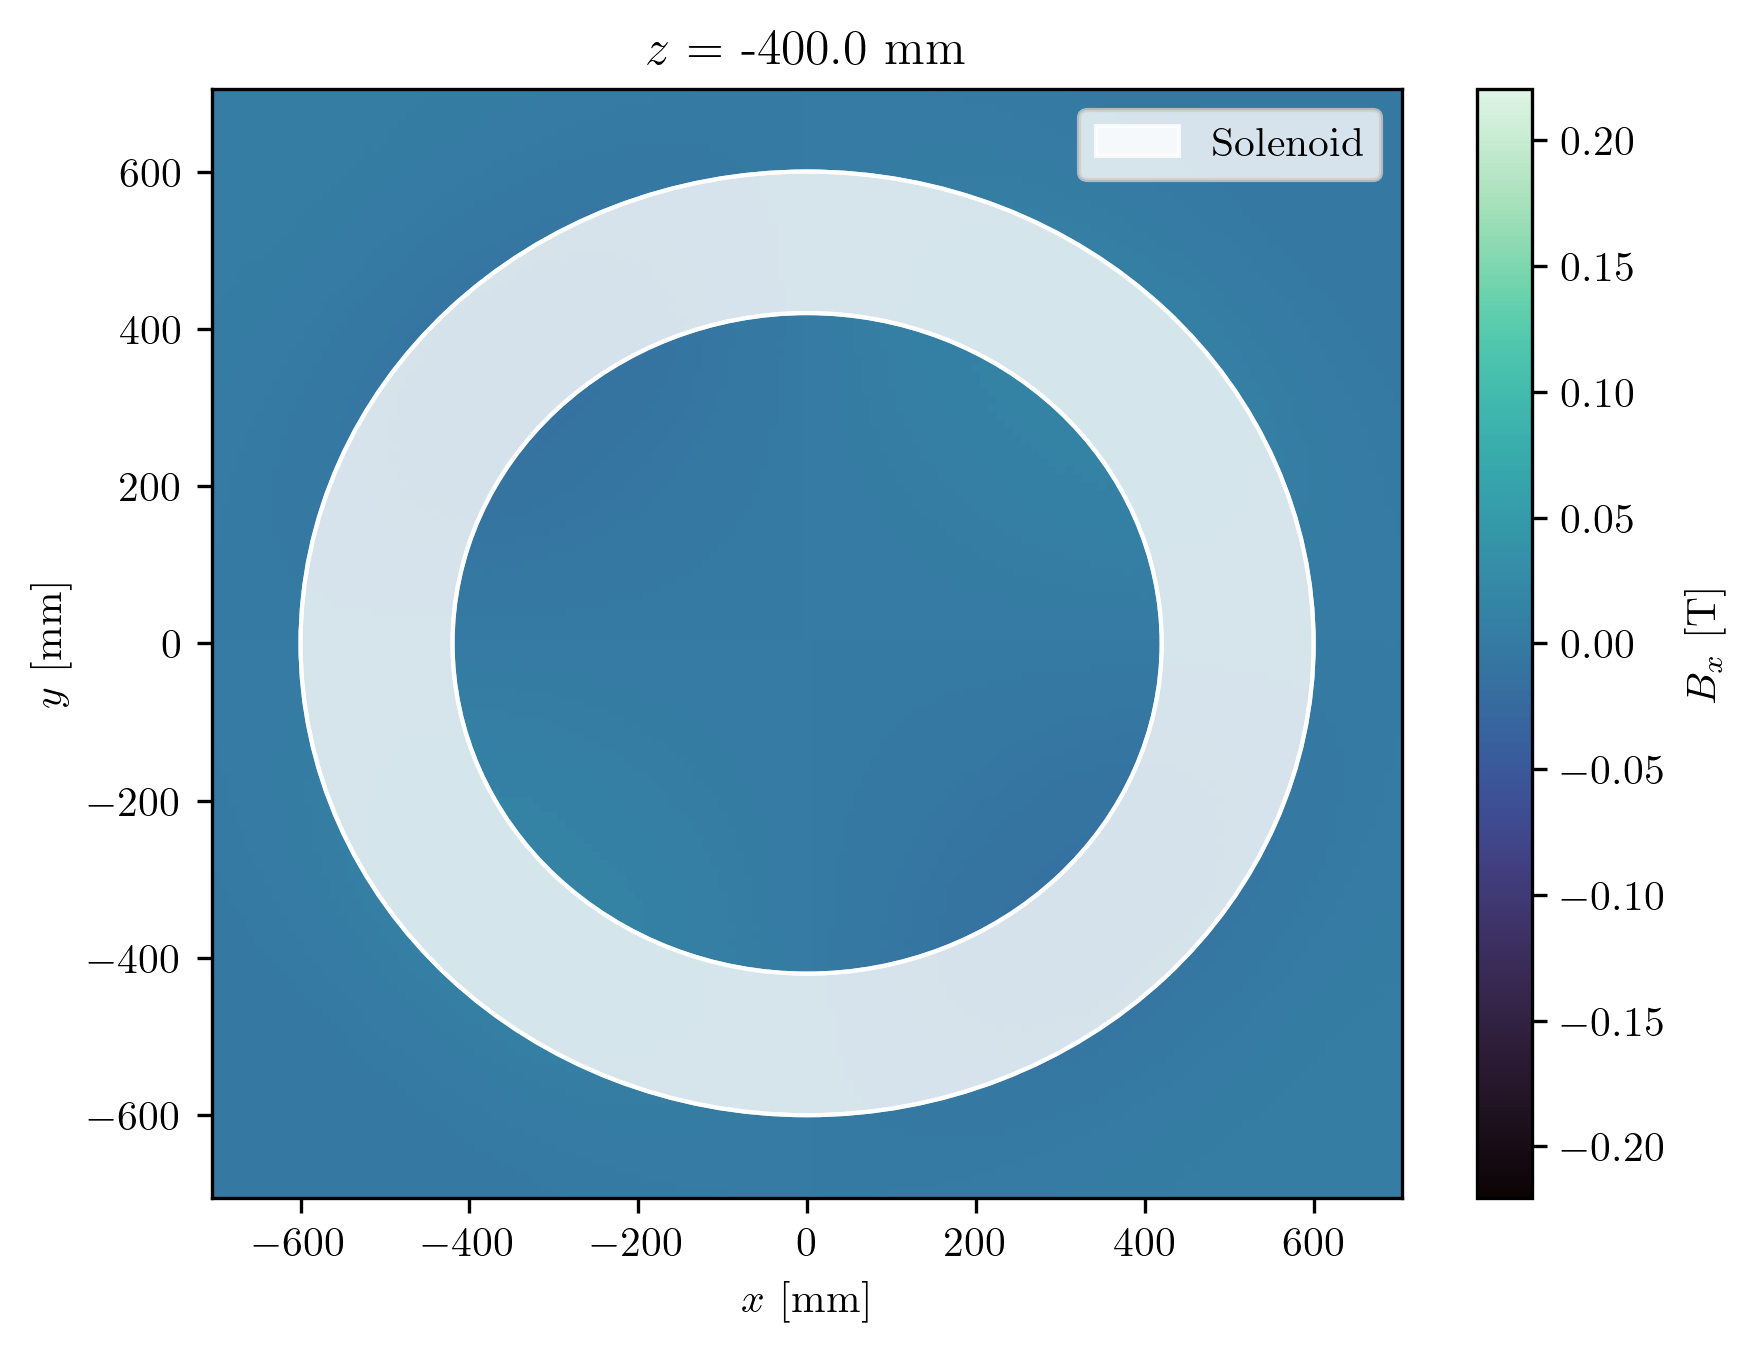

In [33]:
########## B_x ##########

Bx_init = init_data.pivot_table(index='y', columns='x', values='Bx').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_init, cmap=cmap, shading='auto', vmin=data_diff['Bx'].min(), vmax=data_diff['Bx'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_x$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_diff[data_diff['z'] == unique_z[frame]]
    Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
    pcm.set_array(Bx_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'Bx_g4bl_pitch.gif', writer='pillow')

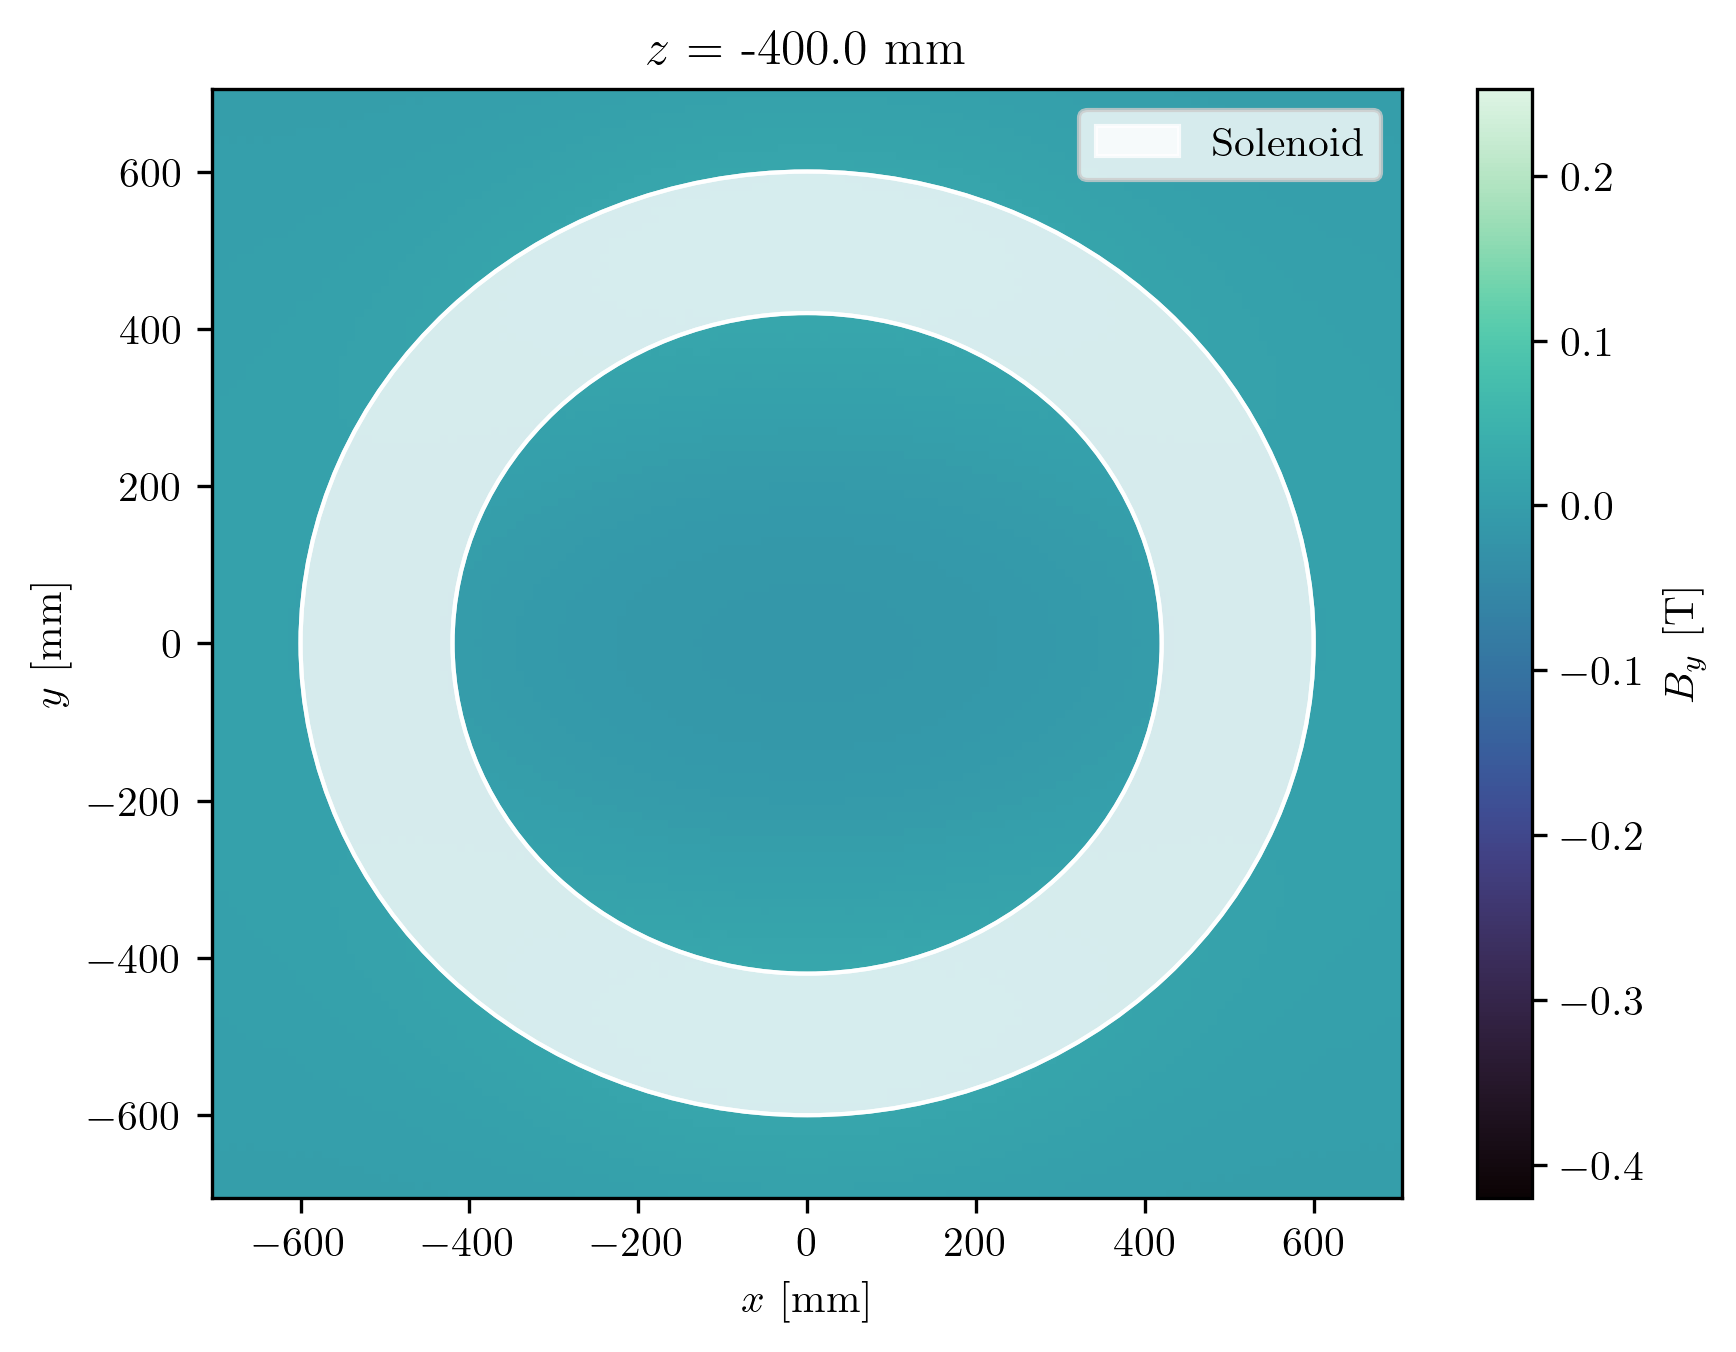

In [34]:
########## B_y ##########

By_init = init_data.pivot_table(index='y', columns='x', values='By').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_init, cmap=cmap, shading='auto', vmin=data_diff['By'].min(), vmax=data_diff['By'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_y$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data_diff[data_diff['z'] == unique_z[frame]]
    By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values
    pcm.set_array(By_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=False)
animation.save(ani_dir+'By_g4bl_pitch.gif', writer='pillow')